# Calculation of Spiral Tip Properties
Tim Tyree<br>
2.25.2021

In [4]:
from lib.my_initialization import *
from lib import *
from lib.utils.merge_cloud_results import *
import seaborn as sns
from scipy.interpolate import CubicSpline
import matplotlib
%load_ext autoreload
%autoreload 2

In [2]:
# # from lib.viewer.PlotEMSD import *
# from lib.measure import compute_Dhat

In [3]:
# #make plots in darkmode
# import seaborn as sns
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# Computing Spiral Tip Properties for one trial

In [1]:
# file=search_for_file()
file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/all_traj_longer_than_1000.csv'

In [6]:
T_min=1000#ms
omit_time=150#ms
DS=0.025#cm/pixel
figsize=(17,4);fontsize=16
saving=True

# df=pd.read_csv(file)
# DT=compute_time_between_frames(df);print(f"DT={DT}")

# df=return_unwrapped_trajectory(df, width, height, sr, mem, dsdpixel, **kwargs)
# df=get_all_longer_than(df,DT,T_min=T_min)

# #count remaining individuals
# num_individuals=len(list(set(df.particle.values)));print(f"num_individuals={num_individuals}")
# emsd=compute_emsd(traj=df.copy(), DT=DT, omit_time=omit_time, printing=False,DS=DS)


In [7]:
# #save emsd
# savefn=f"emsd_longer_than_{T_min}.csv"
# os.chdir(savefig_folder)
# emsd.to_csv(savefn)#,index=False)
# os.path.abspath(savefn)
# # emsd

In [8]:
file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/emsd_longer_than_1000.csv'
DT=0.4
num_individuals=4064
emsd=pd.read_csv(file,index_col='lagt')
# lag_values,slope_values=compute_slope_vs_lag(emsd,T_min,omit_time,window_width=50,stepsize=10)

In [9]:
savefig_folder=os.path.dirname(file)#os.path.join(nb_dir,'Figures/msd_loglog')
savefig_fn=os.path.basename(file).replace('.csv','.png')#f'logMSD_vs_loglag_Tmin_{T_min/10**3:.1f}_N_{trials_considered}_mni_{min_num_individuals}.png'

saved figure in 
	emsd_longer_than_1000.png


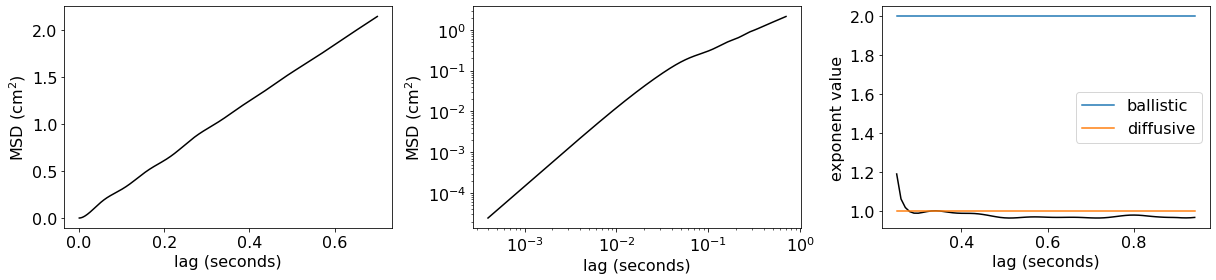

In [10]:

fig,axs=plt.subplots(ncols=3,figsize=figsize)
plot_emsd(axs[0],emsd,label='_Hidden', color='black',alpha=1.)
format_plot_emsd(axs[0],use_loglog=False,fontsize=fontsize)

plot_emsd(axs[1],emsd,label='_Hidden', color='black',alpha=1.)
format_plot_emsd(axs[1],use_loglog=True,fontsize=fontsize)

lag_values,slope_values=compute_slope_vs_lag(emsd,T_min,omit_time,window_width=500,stepsize=10)
plot_slope_of_emsd(axs[2],lag_values,slope_values,label='_Hidden', color='black', alpha=1.,plot_reference_lines=True)

format_slope_of_emsd(axs[2],fontsize=fontsize,use_loglog=False)

if not saving:
    plt.tight_layout()
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

In [11]:
#compute and print v_rms and D
# compute diffusion coefficient and rms velocity of spiral tips
v_rms,Delta_v_rms,_,_,Rsquared_v,_=compute_v_rms(emsd,num_points=8)
Dhat,Delta_Dhat,tau_min,tau_max,Rsquared_D,delta_tau=compute_Dhat(emsd,tau_min=300,window_width=500)

# Dhat,Delta_Dhat,tau_min,tau_max,Rsquared_D,delta_tau=compute_Dhat(emsd,tau_min=200,MSD_thresh=.2,max_lagtime=50)
print(f"make sure the right DT scale was used!")
print(f"make sure to record in spreadsheet!")
print(f"time window for D was from {tau_min:.0f} to {tau_max:.0f} ms.")
print(f"D = {Dhat} +- {Delta_Dhat} cm^2/s... Rsq={Rsquared_D}")
print(f"v_rms = {v_rms} +- {Delta_v_rms} cm/s... Rsq={Rsquared_v}")


make sure the right DT scale was used!
make sure to record in spreadsheet!
time window for D was from 300 to 800 ms.
D = 0.7493536150894692 +- 0.00032435236477258586 cm^2/s... Rsq=0.9999531639575268
v_rms = 11.681972592374715 +- 0.06724019170027333 cm/s... Rsq=0.9999503070021935


In [12]:
#make pd.DataFrame that can be copy/pasted to a spreadsheet
df_output=pd.DataFrame({
    'exponent_final':slope_values[-1],
    'exponent_500':slope_values[lag_values==.5][0],
    "Dhat":[Dhat],
    "Delta_Dhat":[Delta_Dhat],
    "Rsquared_D":[Rsquared_D],
    "v_rms":v_rms,
    "Delta_v_rms":Delta_v_rms,
    "Rsquared_v":Rsquared_v,
    "num_individuals":num_individuals,
    "diffCoef":0.0005,
    'area':25,
    'model':'param_set_8'
})
print(num_individuals)
df_output

4064


,exponent_final,exponent_500,Dhat,Delta_Dhat,Rsquared_D,v_rms,Delta_v_rms,Rsquared_v,num_individuals,diffCoef,area,model
0,0.968574,0.9664,0.749354,0.000324,0.999953,11.681973,0.06724,0.99995,4064,0.0005,25,param_set_8


#  Showing reproducibility with large number of independent trials with the same settings

In [14]:
# file=search_for_file()
file="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.4/longest_unwrapped_trajectories.csv"

In [15]:
T_min=1000#ms
omit_time=150#ms
DS=0.025#cm/pixel
figsize=(17,4);fontsize=16
saving=True

df=pd.read_csv(file)
DT=compute_time_between_frames(df);print(f"DT={DT}")

# df=return_unwrapped_trajectory(df, width, height, sr, mem, dsdpixel, **kwargs)
df=get_all_longer_than(df,DT,T_min=T_min)

#count remaining individuals
num_individuals=len(list(set(df.particle.values)));print(f"num_individuals={num_individuals}")
emsd=compute_emsd(traj=df.copy(), DT=DT, omit_time=omit_time, printing=False,DS=DS)


DT=1.0
num_individuals=156


In [16]:
savefig_folder=os.path.dirname(file)#os.path.join(nb_dir,'Figures/msd_loglog')
savefig_fn=os.path.basename(file).replace('.csv','.png')#f'logMSD_vs_loglag_Tmin_{T_min/10**3:.1f}_N_{trials_considered}_mni_{min_num_individuals}.png'

In [17]:
#save emsd
savefn=f"emsd_longer_than_{T_min}.csv"
os.chdir(savefig_folder)
emsd.to_csv(savefn)#,index=False)
os.path.abspath(savefn)

'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.4/emsd_longer_than_1000.csv'

In [19]:
# file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.4/emsd_longer_than_1000.csv'
# DT=1.0
# num_individuals=156
# emsd=pd.read_csv(file,index_col='lagt')
# # lag_values,slope_values=compute_slope_vs_lag(emsd,T_min,omit_time,window_width=50,stepsize=10)
# emsd.iloc[-1]

saved figure in 
	longest_unwrapped_trajectories.png


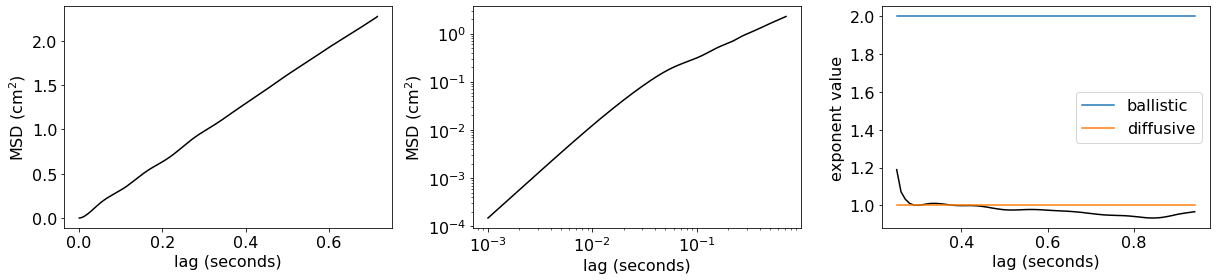

In [20]:

fig,axs=plt.subplots(ncols=3,figsize=figsize)
plot_emsd(axs[0],emsd,label='_Hidden', color='black',alpha=1.)
format_plot_emsd(axs[0],use_loglog=False,fontsize=fontsize)

plot_emsd(axs[1],emsd,label='_Hidden', color='black',alpha=1.)
format_plot_emsd(axs[1],use_loglog=True,fontsize=fontsize)

lag_values,slope_values=compute_slope_vs_lag(emsd,T_min,omit_time,window_width=500,stepsize=10)
plot_slope_of_emsd(axs[2],lag_values,slope_values,label='_Hidden', color='black', alpha=1.,plot_reference_lines=True)

format_slope_of_emsd(axs[2],fontsize=fontsize,use_loglog=False)

if not saving:
    plt.tight_layout()
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

In [21]:
slope_values[-1]
# slope_values[lag_values==.5][0]


0.9662999306673726

In [22]:
#compute and print v_rms and D
# compute diffusion coefficient and rms velocity of spiral tips
v_rms,Delta_v_rms,_,_,Rsquared_v,_=compute_v_rms(emsd,num_points=8)
Dhat,Delta_Dhat,tau_min,tau_max,Rsquared_D,delta_tau=compute_Dhat(emsd,tau_min=300,window_width=500)

# Dhat,Delta_Dhat,tau_min,tau_max,Rsquared_D,delta_tau=compute_Dhat(emsd,tau_min=200,MSD_thresh=.2,max_lagtime=50)
print(f"make sure the right DT scale was used!")
print(f"make sure to record in spreadsheet!")
print(f"time window for D was from {tau_min:.0f} to {tau_max:.0f} ms.")
print(f"D = {Dhat} +- {Delta_Dhat} cm^2/s... Rsq={Rsquared_D}")
print(f"v_rms = {v_rms} +- {Delta_v_rms} cm/s... Rsq={Rsquared_v}")


make sure the right DT scale was used!
make sure to record in spreadsheet!
time window for D was from 300 to 800 ms.
D = 0.7835859198229775 +- 0.0012118563085177095 cm^2/s... Rsq=0.9997525076036896
v_rms = 11.217029621223183 +- 0.1437880740088317 cm/s... Rsq=0.9997535809794501


In [23]:
#make pd.DataFrame that can be copy/pasted to a spreadsheet
df_output=pd.DataFrame({
    'exponent_final':slope_values[-1],
    'exponent_500':slope_values[lag_values==.5][0],
    "Dhat":[Dhat],
    "Delta_Dhat":[Delta_Dhat],
    "Rsquared_D":[Rsquared_D],
    "v_rms":v_rms,
    "Delta_v_rms":Delta_v_rms,
    "Rsquared_v":Rsquared_v,
    "num_individuals":num_individuals,
    "diffCoef":0.0005,
    'area':25,
    'model':'param_set_8'
})
print(num_individuals)
df_output

156


,exponent_final,exponent_500,Dhat,Delta_Dhat,Rsquared_D,v_rms,Delta_v_rms,Rsquared_v,num_individuals,diffCoef,area,model
0,0.9663,0.976476,0.783586,0.001212,0.999753,11.21703,0.143788,0.999754,156,0.0005,25,param_set_8


# Compute key features for each trial from a distributed survey
Using results for 1232 distinct trials

In [79]:
log_folder='/home/timothytyree/Documents/GitHub/care_worker/python/osg_output/Log/'
# log_folder="/Users/timothytyree/Documents/GitHub/care_worker/python/Log"
os.chdir(log_folder)
input_fn_lst=[os.path.abspath(fn) for fn in os.listdir() if fn.find('job.out.')!=-1]
print(f"the number of output files in folder is {len(input_fn_lst)}.")

the number of output files in folder is 2697.


In [85]:
#compute the list of all summarizing results
DS=0.025
tau_min=150#500
window_width=500#2000#500
df_output_lst=[]
for input_fn in input_fn_lst:
    line_no,dict_params=parse_input_params(input_fn)
    # print(dict_params)

    try:
        num_individuals=eval(dict_params['N'])
    except KeyError as e:
        num_individuals=0

    if num_individuals>0:
        emsd=pd.read_csv(input_fn,header=line_no+1,delim_whitespace=True)
    else:
#         print(f'no emsd found in {os.path.basename(input_fn)}')
        emsd=None
    if emsd is not None:
        # def summarize_trial(emsd,dict_params):
        area=(eval(dict_params['L'])*DS)**2#cm^2
        lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=500,omit_time=150,window_width=500,stepsize=10)
#         lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=1000,omit_time=150,window_width=500,stepsize=10)
        v_rms,Delta_v_rms,_,_,Rsquared_v,_=compute_v_rms(emsd,num_points=8)
        Dhat,Delta_Dhat,tau_min,tau_max,Rsquared_D,delta_tau=compute_Dhat(emsd,tau_min=300,window_width=100)
#         Dhat,Delta_Dhat,tau_min,tau_max,Rsquared_D,delta_tau=compute_Dhat(emsd,tau_min=500,window_width=500)
        df_output=pd.DataFrame({
            'exponent_final':slope_values[-1],
#             'exponent_500':slope_values[lag_values==.5][0],
            "Dhat":[Dhat],
            "Delta_Dhat":[Delta_Dhat],
            "Rsquared_D":[Rsquared_D],
            "v_rms":v_rms,
            "Delta_v_rms":Delta_v_rms,
            "Rsquared_v":Rsquared_v,
            "num_individuals":num_individuals,
            "diffCoef":eval(dict_params['diffCoef']),
            'area':area,
            'model':'param_set_8'
        })
        emsd_example=emsd
    #     print(num_individuals)
        df_output_lst.append(df_output)
beep(5)

0

In [82]:
print(f"{len(df_output_lst)} distinct trials were successfully recorded.")
df=pd.concat(df_output_lst)
df.head()

7 distinct trials were successfully recorded.


,exponent_final,Dhat,Delta_Dhat,Rsquared_D,v_rms,Delta_v_rms,Rsquared_v,num_individuals,diffCoef,area,model
0,1.283678,4.860891,0.031794,0.997876,27.807500,0.234459,0.999893,24,0.00100,49.0,param_set_8
0,0.771962,1.209716,0.037414,0.954574,22.348055,0.144289,0.999937,37,0.00075,64.0,param_set_8
0,1.137448,1.762669,0.018040,0.994816,22.634450,0.144886,0.999939,35,0.00075,64.0,param_set_8
0,0.920628,1.760465,0.041327,0.973316,27.211441,0.195261,0.999923,33,0.00100,100.0,param_set_8
0,1.048396,1.208110,0.006560,0.998536,20.567032,0.092009,0.999970,35,0.00075,64.0,param_set_8


In [83]:
#save df as csv in care
save_folder=os.path.join(nb_dir,'Data/cloud_results')
os.chdir(save_folder)
save_fn='cloud_results_lr_versus_diffCoef_versus_area.csv'
# save_fn='cloud_results_fk_versus_diffCoef_versus_area.csv'
df.to_csv(save_fn)

In [88]:
emsd=emsd_example

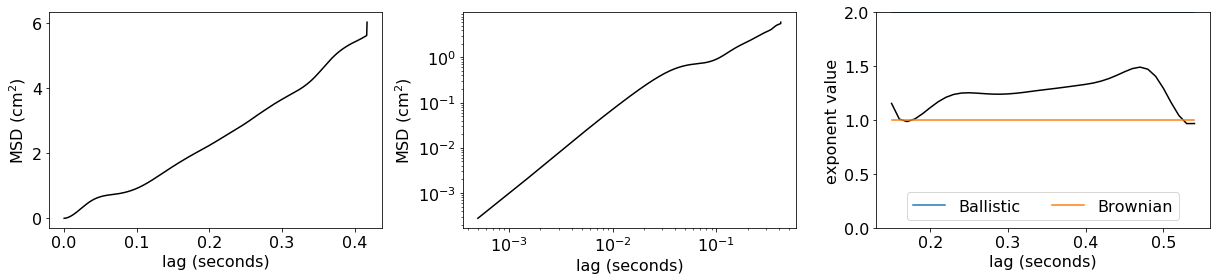

In [92]:
savefig_folder=os.path.join(nb_dir,'Figures/msd_exponents')
os.chdir(save_folder)
savefig_fn='cloud_results_lr_versus_diffCoef_versus_area.png'
# savefig_fn='cloud_results_fk_versus_diffCoef_versus_area.png'

#plot emsd and exponent for given pd.DataFrame instance named emsd
saving=False
figsize=(17,4);fontsize=16
fig,axs=plt.subplots(ncols=3,figsize=figsize)
plot_emsd(axs[0],emsd,label='_Hidden', color='black',alpha=1.)
format_plot_emsd(axs[0],use_loglog=False,fontsize=fontsize)

plot_emsd(axs[1],emsd,label='_Hidden', color='black',alpha=1.)
format_plot_emsd(axs[1],use_loglog=True,fontsize=fontsize)

lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=700,omit_time=150,window_width=300,stepsize=10)
# lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=1000,omit_time=150,window_width=1000,stepsize=10)
plot_slope_of_emsd(axs[2],lag_values,slope_values,label='_Hidden', color='black', alpha=1.,plot_reference_lines=True)
format_slope_of_emsd(axs[2],fontsize=fontsize,use_loglog=False,loc='lower center')
axs[2].set_ylim(0,2)
if not saving:
    plt.tight_layout()
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

# Showing independence of $D_\text{spiral tips}$ coefficient on domain area

__Result__
- for diffCoef fixed, D_spiral_tips was not significantly affected by changes to the domain size.
- ^this result is robust for all diffusion coefficients studied
    - D=0.00025, yes
    - D=0.0005, yes
    - D=0.00075, yes
    - D=0.001, yes
    - D=0.00005, yes
    - D=0.00001, yes 

In [33]:
#import merged cloud results
data_dir=f'{nb_dir}/Data/cloud_results/cloud_results_lr_versus_diffCoef_versus_area.csv'
# data_dir=f'{nb_dir}/Data/cloud_results/cloud_results_fk_versus_diffCoef_versus_area.csv'
df=pd.read_csv(data_dir,index_col=0).reset_index(drop=True)
#make DVmem field that has the correct values for transmembrane diffusion coefficient
df['DVmem']=df['diffCoef']
df.loc[df.DVmem==1.0,'DVmem']=float(1e-05)
df.loc[df.DVmem==5.0,'DVmem']=float(5e-05)
df['DVmem']*=10**3
df.head()

,exponent_final,Dhat,Delta_Dhat,Rsquared_D,v_rms,Delta_v_rms,Rsquared_v,num_individuals,diffCoef,area,model,DVmem
0,1.283678,4.860891,0.031794,0.997876,27.807500,0.234459,0.999893,24,0.00100,49.0,param_set_8,1.00
1,0.771962,1.209716,0.037414,0.954574,22.348055,0.144289,0.999937,37,0.00075,64.0,param_set_8,0.75
2,1.137448,1.762669,0.018040,0.994816,22.634450,0.144886,0.999939,35,0.00075,64.0,param_set_8,0.75
3,0.920628,1.760465,0.041327,0.973316,27.211441,0.195261,0.999923,33,0.00100,100.0,param_set_8,1.00
4,1.048396,1.208110,0.006560,0.998536,20.567032,0.092009,0.999970,35,0.00075,64.0,param_set_8,0.75


In [54]:
vals=df.diffCoef.values
print(f"max:{np.max(vals)}, mean:{np.mean(vals)}, min:{np.min(vals)}")
diffCoef_lst=sorted(set(vals))
print(f"diffCoef's present are {diffCoef_lst}.")

#compute the min,mean,max num_individuals considered over all trials
vals=df.num_individuals.values
print(f"for num_individuals, max:{np.max(vals)}, mean:{np.mean(vals)}, min:{np.min(vals)}")
num_individuals_thresh=31#31

max:0.001, mean:0.0008571428571428572, min:0.00075
diffCoef's present are [0.00075, 0.001].
for num_individuals, max:37, mean:28.142857142857142, min:8


In [55]:
diffCoef=diffCoef_lst[0]

d=df[(df.diffCoef==diffCoef)&(df.num_individuals>=num_individuals_thresh)]
area_lst=sorted(set(d['area'].values))
print(f"areas present are {area_lst} cm^2 for diffCoef={diffCoef} fixed.")

areas present are [64.0] cm^2 for diffCoef=0.00075 fixed.


In [56]:
D_uncertainty_lst=[]
D_expected_lst=[]
#print the average+-stdev output feature for each fixed area
for area in area_lst:
    #compute the net uncertainty from the stdev of Dhat with mean Delta_Dhat
    f=d[d.area==area]
    D_uncertainty=np.sqrt((2*f.Dhat.std())**2+f.Delta_Dhat.mean()**2)
    D_expected=f.Dhat.mean()
    print(f"with area={area} cm^2 fixed and diffCoef={diffCoef} cm^2/s fixed,")
    print(f"for {f.Dhat.count()} trials having at least {num_individuals_thresh} individuals,")
    print(f"the 95% CI for D_spiral_tips was {D_expected:.4f} +-{D_uncertainty:.4f} cm^2/s.\n")
    D_uncertainty_lst.append(D_uncertainty)
    D_expected_lst.append(D_expected)

with area=64.0 cm^2 fixed and diffCoef=0.00075 cm^2/s fixed,
for 3 trials having at least 31 individuals,
the 95% CI for D_spiral_tips was 1.3935 +-0.6398 cm^2/s.



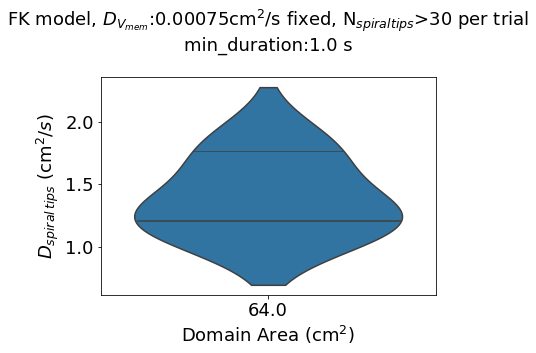

In [57]:
fontsize=18
#TODO: make plot function for plotting error bars
ax = sns.violinplot(x="area", y="Dhat", data=d, inner="stick")
ax.set_xlabel(r'Domain Area (cm$^2$)',fontsize=fontsize)
ax.set_ylabel(r'$D_{spiral\,tips}$ (cm$^2/s$)',fontsize=fontsize)
ax.set_title(f'FK model, $D_{{V_{{mem}}}}$:{diffCoef}cm$^2$/s fixed, N$_{{spiral tips}}$>{num_individuals_thresh-1} per trial\nmin_duration:{1:.1f} s\n',fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
plt.show()

# Showing independence of $D_\text{spiral tips}$ for $A_\text{domain}=49cm^2$ fixed


In [217]:
#import merged cloud results
data_dir=f'{nb_dir}/Data/cloud_results/cloud_results_lr_versus_diffCoef_versus_area.csv'
# data_dir=f'{nb_dir}/Data/cloud_results/cloud_results_fk_versus_diffCoef_versus_area.csv'
df=pd.read_csv(data_dir,index_col=0).reset_index(drop=True)
#make DVmem field that has the correct values for transmembrane diffusion coefficient
df['DVmem']=df['diffCoef']
df.loc[df.DVmem==1.0,'DVmem']=float(1e-05)
df.loc[df.DVmem==5.0,'DVmem']=float(5e-05)
df['DVmem']*=10**3
# df.head()

In [230]:
num_individuals_thresh=31
area_lst=sorted(set(df['area'].values))

area=area_lst[2]

d=df[(df.area==area)&(df.num_individuals>=num_individuals_thresh)]
vals=d.DVmem.values
print(f"max:{np.max(vals)}, mean:{np.mean(vals)}, min:{np.min(vals)}")
DVmem_lst=sorted(set(vals))
print(f"DVmem values present are {DVmem_lst} cm^2/s \nfor area={area} cm^2  fixed.")

IndexError: list index out of range

In [227]:
df[(df.area==area)].describe()

,exponent_final,Dhat,Delta_Dhat,Rsquared_D,v_rms,Delta_v_rms,Rsquared_v,num_individuals,diffCoef,area,DVmem
count,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000,1.0,1.0
mean,0.920628,1.760465,0.041327,0.973316,27.211441,0.195261,0.999923,33.0,0.001,100.0,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.920628,1.760465,0.041327,0.973316,27.211441,0.195261,0.999923,33.0,0.001,100.0,1.0
25%,0.920628,1.760465,0.041327,0.973316,27.211441,0.195261,0.999923,33.0,0.001,100.0,1.0
50%,0.920628,1.760465,0.041327,0.973316,27.211441,0.195261,0.999923,33.0,0.001,100.0,1.0
75%,0.920628,1.760465,0.041327,0.973316,27.211441,0.195261,0.999923,33.0,0.001,100.0,1.0
max,0.920628,1.760465,0.041327,0.973316,27.211441,0.195261,0.999923,33.0,0.001,100.0,1.0


In [228]:
D_uncertainty_lst=[]
D_expected_lst=[]
#print the average+-stdev output feature for each fixed area
for DVmem in DVmem_lst:
    #compute the net uncertainty from the stdev of Dhat with mean Delta_Dhat
    f=d[d.DVmem==DVmem]
    D_uncertainty=np.sqrt((2*f.Dhat.std())**2+f.Delta_Dhat.mean()**2)
    D_expected=f.Dhat.mean()
    print(f"with area={area} cm^2 fixed and diffCoef={DVmem} cm^2/s fixed,")
    print(f"for {f.Dhat.count()} trials having at least {num_individuals_thresh} individuals,")
    print(f"the 95% CI for D_spiral_tips was {D_expected:.4f} +-{D_uncertainty:.4f} cm^2/s.\n")
    D_uncertainty_lst.append(D_uncertainty)
    D_expected_lst.append(D_expected)

with area=100.0 cm^2 fixed and diffCoef=1.0 cm^2/s fixed,
for 1 trials having at least 31 individuals,
the 95% CI for D_spiral_tips was 1.7605 +-nan cm^2/s.



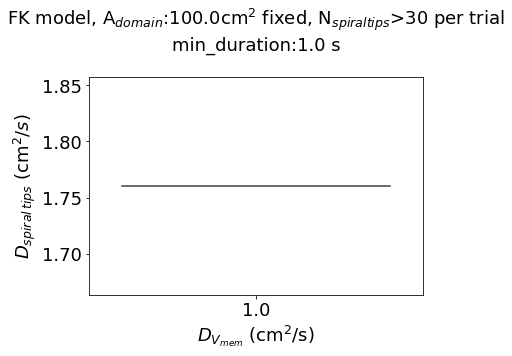

In [229]:
fontsize=18
ax = sns.violinplot(x="DVmem", y="Dhat", data=d, inner="stick")
ax.set_xlabel(r'$D_{V_{mem}}$ (cm$^2/$s)',fontsize=fontsize)
ax.set_ylabel(r'$D_{spiral\,tips}$ (cm$^2/s$)',fontsize=fontsize)
ax.set_title(f'FK model, A$_{{domain}}$:{area}cm$^2$ fixed, N$_{{spiral tips}}$>{num_individuals_thresh-1} per trial\nmin_duration:{1:.1f} s\n',fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
plt.show()

# Supporting diffusive behavior for area and DVmem fixed

In [65]:
#import merged cloud results
data_dir=f'{nb_dir}/Data/cloud_results/cloud_results_lr_versus_diffCoef_versus_area.csv'
# data_dir=f'{nb_dir}/Data/cloud_results/cloud_results_fk_versus_diffCoef_versus_area.csv'
df=pd.read_csv(data_dir,index_col=0).reset_index(drop=True)
#make DVmem field that has the correct values for transmembrane diffusion coefficient
df['DVmem']=df['diffCoef']
df.loc[df.DVmem==1.0,'DVmem']=float(1e-05)
df.loc[df.DVmem==5.0,'DVmem']=float(5e-05)
df['DVmem']*=10**3
df.head()

,exponent_final,Dhat,Delta_Dhat,Rsquared_D,v_rms,Delta_v_rms,Rsquared_v,num_individuals,diffCoef,area,model,DVmem
0,1.283678,4.860891,0.031794,0.997876,27.807500,0.234459,0.999893,24,0.00100,49.0,param_set_8,1.00
1,0.771962,1.209716,0.037414,0.954574,22.348055,0.144289,0.999937,37,0.00075,64.0,param_set_8,0.75
2,1.137448,1.762669,0.018040,0.994816,22.634450,0.144886,0.999939,35,0.00075,64.0,param_set_8,0.75
3,0.920628,1.760465,0.041327,0.973316,27.211441,0.195261,0.999923,33,0.00100,100.0,param_set_8,1.00
4,1.048396,1.208110,0.006560,0.998536,20.567032,0.092009,0.999970,35,0.00075,64.0,param_set_8,0.75


In [64]:
#get all trials for a given DVmem and area
# num_individuals_thresh=31
area=area_lst[0]
DVmem=DVmem_lst[0]
boo=df.area==area
boo&=df.DVmem==DVmem
boo&=df.num_individuals>=num_individuals_thresh
d=df[boo]
d.head()

,exponent_final,Dhat,Delta_Dhat,Rsquared_D,v_rms,Delta_v_rms,Rsquared_v,num_individuals,diffCoef,area,model,DVmem


In [161]:
print(d[['exponent_final','exponent_500']].describe().T)

                count      mean       std       min       25%       50%  \
exponent_final   16.0  1.157023  0.064363  1.020631  1.121056  1.161905   
exponent_500     16.0  0.853208  0.035393  0.792678  0.833335  0.849204   

                     75%       max  
exponent_final  1.193279  1.259643  
exponent_500    0.866108  0.928346  


__Results__
- The 95% CI for the exponent_500 is significantly smaller than the 95% CI for exponent_final for $A_\text{domain}=64cm^2$ fixed and $D_{V_{mem}}=0.05 cm^2/s$ fixed.
- the final exponent is not significantly different from unity
- the exponent at 500 ms is significantly less than unity (with $p\le0.05$ for significance)

# scan through folder of cloud results, and add plots to axis when A_domain and D_Vmem have a given value

In [93]:
#import merged cloud results
data_dir=f'{nb_dir}/Data/cloud_results/cloud_results_lr_versus_diffCoef_versus_area.csv'
# data_dir=f'{nb_dir}/Data/cloud_results/cloud_results_fk_versus_diffCoef_versus_area.csv'
df=pd.read_csv(data_dir,index_col=0).reset_index(drop=True)
#make DVmem field that has the correct values for transmembrane diffusion coefficient
df['DVmem']=df['diffCoef']
df.loc[df.DVmem==1.0,'DVmem']=float(1e-05)
df.loc[df.DVmem==5.0,'DVmem']=float(5e-05)
df['DVmem']*=10**3
# df.head()

In [94]:
area=49.0#cm^2  #64
vals=df[df.area==area].diffCoef.values
print(f"max:{np.max(vals)}, mean:{np.mean(vals)}, min:{np.min(vals)}")
diffCoef_lst=sorted(set(vals))
print(f"diffCoef's present are {diffCoef_lst}.")


max:0.001, mean:0.001, min:0.001
diffCoef's present are [0.001].


In [98]:
diffCoef=diffCoef_lst[0]

#declare query
DS=0.025
T_min=500#2000
num_individuals_thresh=11
L=int(np.sqrt(area/DS**2))
DVmem=np.around(df[df['diffCoef']==diffCoef]['DVmem'].mean(),5)
print(f"querying folder for fixed parameters: (diffCoef,L) = {(diffCoef,L)}.")

querying folder for fixed parameters: (diffCoef,L) = (0.001, 280).


In [103]:
log_folder=f'{nb_dir}/../../care_worker/python/osg_output/Log/'
os.chdir(log_folder)
input_fn_lst=[os.path.abspath(fn) for fn in os.listdir() if fn.find('job.out.')!=-1]
print(f"the total number of output files in folder is {len(input_fn_lst)}.")
emsd_lst=[]
num_individuals_lst=[]
#compute the list of all summarizing results
df_output_lst=[]
for input_fn in input_fn_lst:
    line_no,dict_params=parse_input_params(input_fn)
    # print(dict_params)

    try:
        num_individuals=eval(dict_params['N'])
        boo=eval(dict_params['diffCoef'])==diffCoef
        boo&=eval(dict_params['L'])==L
        boo&=num_individuals>num_individuals_thresh
    except KeyError as e:
        boo=False
    if boo:
        emsd=pd.read_csv(input_fn,header=line_no+1,delim_whitespace=True)
        # def summarize_trial(emsd,dict_params):
        area=(eval(dict_params['L'])*DS)**2#cm^2
        lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=T_min,omit_time=150,window_width=100,stepsize=10)
#         lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=1000,omit_time=150,window_width=500,stepsize=10)
        v_rms,Delta_v_rms,_,_,Rsquared_v,_=compute_v_rms(emsd,num_points=8)
        Dhat,Delta_Dhat,tau_min,tau_max,Rsquared_D,delta_tau=compute_Dhat(emsd,tau_min=300,window_width=100)
#         Dhat,Delta_Dhat,tau_min,tau_max,Rsquared_D,delta_tau=compute_Dhat(emsd,tau_min=300,window_width=500)
        df_output=pd.DataFrame({
            'exponent_final':slope_values[-1],
#             'exponent_500':slope_values[lag_values==.5][0],
            "Dhat":[Dhat],
            "Delta_Dhat":[Delta_Dhat],
            "Rsquared_D":[Rsquared_D],
            "v_rms":v_rms,
            "Delta_v_rms":Delta_v_rms,
            "Rsquared_v":Rsquared_v,
            "num_individuals":num_individuals,
            "diffCoef":eval(dict_params['diffCoef']),
            'area':area,
            'model':'param_set_8'
        })
        #     print(num_individuals)
        df_output_lst.append(df_output)
        emsd_lst.append(emsd)
        num_individuals_lst.append(num_individuals)
print(f"the number of distinct trials are represented in this query is {len(emsd_lst)}.")

the total number of output files in folder is 2697.
the number of distinct trials are represented in this query is 1.


In [107]:
emsd_lst

[           lagt
 0.5    0.000288
 1.0    0.000988
 1.5    0.002070
 2.0    0.003544
 2.5    0.005399
 ...         ...
 400.0  5.035912
 400.5  5.042589
 401.0  5.049270
 401.5  5.055992
 402.0  5.225429
 
 [804 rows x 1 columns]]

In [108]:
#compute avg_emsd, weighted by num_individuals_lst
Nnet=sum(num_individuals_lst)
lag_values=np.arange(0,T_min+1,1)
avg_emsd=0.*lag_values
index_values=emsd_lst[0].index.values
num_over=0
for i,(emsd,num_individuals,df_output) in enumerate(zip(emsd_lst,num_individuals_lst,df_output_lst)):
    emsd=emsd.rename(columns={'lagt':'msd'}).copy()
    #fit spline curve to the given emsd
    x = emsd.index.values
    y = emsd.values
    interpolated_values=CubicSpline(x, y)(lag_values).T[0]
    weight=num_individuals/Nnet
    avg_emsd += weight*interpolated_values
    if x[-1]<=T_min:
        num_over+=1
print(f"the number of trials extrapolating is {num_over}.  If {num_over} is large, consider decreasing T_min.")

the number of trials extrapolating is 1.  If 1 is large, consider decreasing T_min.


In [109]:
#compute standard deviation of avg_emsd, weighted by num_individuals_lst
SSE_avg_emsd=0.*lag_values
index_values=emsd_lst[0].index.values
num_over=0
for i,(emsd,num_individuals,df_output) in enumerate(zip(emsd_lst,num_individuals_lst,df_output_lst)):
    emsd=emsd.rename(columns={'lagt':'msd'}).copy()
    #fit spline curve to the given emsd
    x = emsd.index.values
    y = emsd.values
    interpolated_values=CubicSpline(x, y)(lag_values).T[0]
    weight=num_individuals/Nnet
    SSE_avg_emsd += weight*(interpolated_values-avg_emsd)**2
std_avg_emsd=np.sqrt(SSE_avg_emsd)

In [110]:
emsd_avg=pd.DataFrame(
    data=avg_emsd,
    index=lag_values,
    dtype=np.float64)
emsd_std=pd.DataFrame(
    data=std_avg_emsd,
    index=lag_values,
    dtype=np.float64)
#save emsd_avg as csv in care
save_folder=os.path.join(nb_dir,'Data/cloud_results/averages')
os.chdir(save_folder)
save_fn=f'emsd_avg_lr_diffCoef_{DVmem}_area_{area}.csv'
# save_fn=f'emsd_avg_fk_diffCoef_{DVmem}_area_{area}.csv'
emsd_avg.to_csv(save_fn)
save_fn=f'emsd_std_lr_diffCoef_{DVmem}_area_{area}.csv'
# save_fn=f'emsd_std_fk_diffCoef_{DVmem}_area_{area}.csv'
emsd_std.to_csv(save_fn)
print(f'ensemble avg. emsd saved to\n{os.path.abspath(save_fn)}')

ensemble avg. emsd saved to
/home/timothytyree/Documents/GitHub/care/notebooks/Data/cloud_results/averages/emsd_std_lr_diffCoef_1.0_area_49.0.csv


AssertionError: 

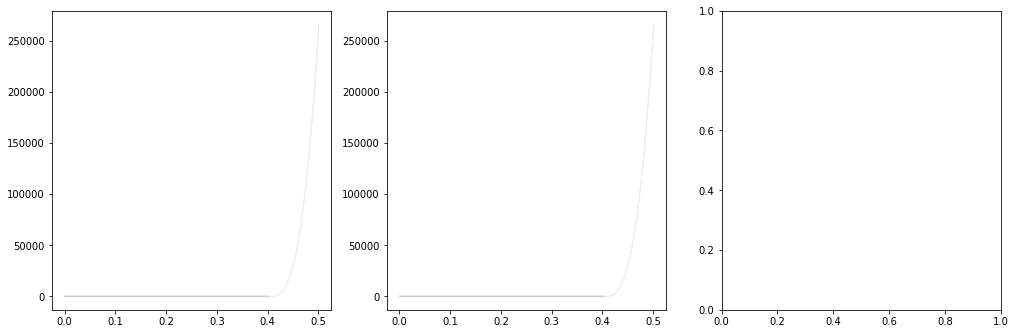

In [111]:
#for window_width in [50,300,500]:
window_width=50
omit_time=0
#plot emsd and exponent for fixed diffCoef and area
saving=True
savefig_folder=os.path.join(nb_dir,'Figures/cloud_results/')
# savefig_fn=f'fk_diffCoef_{DVmem}_area_{area}_fig_a_ww_{window_width}.png'
savefig_fn=f'lr_diffCoef_{DVmem}_area_{area}_fig_a_ww_{window_width}.png'

figsize=(17,5.5);fontsize=18
xmax=2;ymax=3
fig,axs=plt.subplots(ncols=3,figsize=figsize)
#plot an estimate for the 95% CI of the ensemble averaged EMSD
lowerbound=(emsd_avg.values-2*emsd_std.values).T[0]
upperbound=(emsd_avg.values+2*emsd_std.values).T[0]
axs[0].fill_between(x=lag_values/10**3,
        y1=lowerbound,y2=upperbound,
        interpolate=True,color='green',alpha=0.1,label='_Hidden')  
axs[1].fill_between(x=lag_values/10**3,
        y1=lowerbound,y2=upperbound,
        interpolate=True,color='green',alpha=0.1,label='_Hidden') 
#plot avg_emsd over each emsd in emsd_lst
for emsd in emsd_lst:
    plot_emsd(axs[0],emsd,label='_Hidden', color='grey',alpha=.3)
    plot_emsd(axs[1],emsd,label='_Hidden', color='gray',alpha=.3)
    tau_values,slope_values=compute_slope_vs_lag(emsd,T_min=T_min,omit_time=omit_time,window_width=window_width,stepsize=10)
    plot_slope_of_emsd(axs[2],tau_values,slope_values,label='_Hidden', color='gray', alpha=.3,plot_reference_lines=False) 
#plot the ensemble average emsd_avg
plot_emsd(axs[0],emsd_avg,label='_Hidden', color='green',alpha=1.)
format_plot_emsd(axs[0],use_loglog=False,fontsize=fontsize)
plot_emsd(axs[1],emsd_avg,label='_Hidden', color='green',alpha=1.)
format_plot_emsd(axs[1],use_loglog=True,fontsize=fontsize)
axs[0].set_xlim(0,xmax)
axs[0].set_ylim(0,ymax)
axs[1].set_xlim(5*10**-3,xmax)
ax=axs[2]
tau_values,slope_values=compute_slope_vs_lag(emsd_avg,T_min=T_min,omit_time=omit_time,window_width=window_width,stepsize=10)
plot_slope_of_emsd(ax,tau_values,slope_values,label='weighted avg.', color='green', alpha=1,plot_reference_lines=True)
format_slope_of_emsd(ax,fontsize=fontsize,use_loglog=False,plot_reference_lines=False)
ax.set_xlim(0,xmax)
ax.set_ylim(0,2.1)
ax.legend(loc='best',fontsize=fontsize-4,ncol=1)
fig.suptitle(f'$A_{{domain}}$ = {int(area)} cm$^2$, $D_{{V_{{mem}}}}$ = {DVmem} cm$^2/s$, $N_{{trials}}$={len(emsd_lst)}',fontsize=fontsize+4)
fig.subplots_adjust(top=.25)
plt.tight_layout()
if not saving:
    plt.show()
else:
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

## Generate Fig. a for all diffCoef with area fixed

In [266]:
#import merged cloud results
data_dir=f'{nb_dir}/Data/cloud_results/cloud_results_fk_versus_diffCoef_versus_area.csv'
df=pd.read_csv(data_dir,index_col=0).reset_index(drop=True)
#make DVmem field that has the correct values for transmembrane diffusion coefficient
df['DVmem']=df['diffCoef']
df.loc[df.DVmem==1.0,'DVmem']=float(1e-05)
df.loc[df.DVmem==5.0,'DVmem']=float(5e-05)
df['DVmem']*=10**3
# df.head()

area=49.0#cm^2  #64
vals=df[df.area==area].diffCoef.values
print(f"max:{np.max(vals)}, mean:{np.mean(vals)}, min:{np.min(vals)}")
diffCoef_lst=sorted(set(vals))
print(f"looping over diffCoef in  {diffCoef_lst}.")

#declare query
DS=0.025
T_min=2000
num_individuals_thresh=31
L=int(np.sqrt(area/DS**2))

#find all raw emsd results from cloud
log_folder=f'{nb_dir}/../../care_worker/python/osg_output/Log/'
os.chdir(log_folder)
input_fn_lst=[os.path.abspath(fn) for fn in os.listdir() if fn.find('job.out.')!=-1]
print(f"the total number of output files in folder is {len(input_fn_lst)}.")

for diffCoef in diffCoef_lst:
    DVmem=np.around(df[df['diffCoef']==diffCoef]['DVmem'].mean(),5)
    print(f"querying folder for fixed parameters: (diffCoef,L) = {(diffCoef,L)}.")
    emsd_lst=[]
    num_individuals_lst=[]
    #compute the list of all summarizing results
    df_output_lst=[]
    for input_fn in input_fn_lst:
        line_no,dict_params=parse_input_params(input_fn)
        # print(dict_params)

        try:
            num_individuals=eval(dict_params['N'])
            boo=eval(dict_params['diffCoef'])==diffCoef
            boo&=eval(dict_params['L'])==L
            boo&=num_individuals>num_individuals_thresh
        except KeyError as e:
            boo=False
        if boo:
            emsd=pd.read_csv(input_fn,header=line_no+1,delim_whitespace=True)
            # def summarize_trial(emsd,dict_params):
            area=(eval(dict_params['L'])*DS)**2#cm^2
            lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=1000,omit_time=150,window_width=500,stepsize=10)
            v_rms,Delta_v_rms,_,_,Rsquared_v,_=compute_v_rms(emsd,num_points=8)
            Dhat,Delta_Dhat,tau_min,tau_max,Rsquared_D,delta_tau=compute_Dhat(emsd,tau_min=300,window_width=500)
            df_output=pd.DataFrame({
                'exponent_final':slope_values[-1],
                'exponent_500':slope_values[lag_values==.5][0],
                "Dhat":[Dhat],
                "Delta_Dhat":[Delta_Dhat],
                "Rsquared_D":[Rsquared_D],
                "v_rms":v_rms,
                "Delta_v_rms":Delta_v_rms,
                "Rsquared_v":Rsquared_v,
                "num_individuals":num_individuals,
                "diffCoef":eval(dict_params['diffCoef']),
                'area':area,
                'model':'param_set_8'
            })
            #     print(num_individuals)
            df_output_lst.append(df_output)
            emsd_lst.append(emsd)
            num_individuals_lst.append(num_individuals)
    print(f"the number of distinct trials are represented in this query is {len(emsd_lst)}.")

    #compute avg_emsd, weighted by num_individuals_lst
    Nnet=sum(num_individuals_lst)
    lag_values=np.arange(0,T_min+1,1)
    avg_emsd=0.*lag_values
    index_values=emsd_lst[0].index.values
    num_over=0
    for i,(emsd,num_individuals,df_output) in enumerate(zip(emsd_lst,num_individuals_lst,df_output_lst)):
        emsd=emsd.rename(columns={'lagt':'msd'}).copy()
        #fit spline curve to the given emsd
        x = emsd.index.values
        y = emsd.values
        interpolated_values=CubicSpline(x, y)(lag_values).T[0]
        weight=num_individuals/Nnet
        avg_emsd += weight*interpolated_values
        if x[-1]<=T_min:
            num_over+=1
    print(f"the number of trials extrapolating is {num_over}.  If {num_over} is large, consider decreasing T_min.")

    #compute standard deviation of avg_emsd, weighted by num_individuals_lst
    SSE_avg_emsd=0.*lag_values
    index_values=emsd_lst[0].index.values
    num_over=0
    for i,(emsd,num_individuals,df_output) in enumerate(zip(emsd_lst,num_individuals_lst,df_output_lst)):
        emsd=emsd.rename(columns={'lagt':'msd'}).copy()
        #fit spline curve to the given emsd
        x = emsd.index.values
        y = emsd.values
        interpolated_values=CubicSpline(x, y)(lag_values).T[0]
        weight=num_individuals/Nnet
        SSE_avg_emsd += weight*(interpolated_values-avg_emsd)**2
    std_avg_emsd=np.sqrt(SSE_avg_emsd)

    emsd_avg=pd.DataFrame(
        data=avg_emsd,
        index=lag_values,
        dtype=np.float64)
    emsd_std=pd.DataFrame(
        data=std_avg_emsd,
        index=lag_values,
        dtype=np.float64)
    #save emsd_avg as csv in care
    save_folder=os.path.join(nb_dir,'Data/cloud_results/averages')
    os.chdir(save_folder)
    save_fn=f'emsd_avg_fk_diffCoef_{DVmem}_area_{area}.csv'
    emsd_avg.to_csv(save_fn)
    save_fn=f'emsd_std_fk_diffCoef_{DVmem}_area_{area}.csv'
    emsd_std.to_csv(save_fn)
#     print(f'ensemble avg. emsd saved to\n{os.path.abspath(save_fn)}')

    for window_width in [50,300,500]:
#         window_width=50
        omit_time=0
        #plot emsd and exponent for fixed diffCoef and area
        saving=True
        savefig_folder=os.path.join(nb_dir,'Figures/cloud_results/')
        savefig_fn=f'diffCoef_{DVmem}_area_{area}_fig_a_ww_{window_width}.png'

        figsize=(17,5.5);fontsize=18
        xmax=2;ymax=3
        fig,axs=plt.subplots(ncols=3,figsize=figsize)
        #plot an estimate for the 95% CI of the ensemble averaged EMSD
        lowerbound=(emsd_avg.values-2*emsd_std.values).T[0]
        upperbound=(emsd_avg.values+2*emsd_std.values).T[0]
        axs[0].fill_between(x=lag_values/10**3,
                y1=lowerbound,y2=upperbound,
                interpolate=True,color='green',alpha=0.1,label='_Hidden')  
        axs[1].fill_between(x=lag_values/10**3,
                y1=lowerbound,y2=upperbound,
                interpolate=True,color='green',alpha=0.1,label='_Hidden') 
        #plot avg_emsd over each emsd in emsd_lst
        for emsd in emsd_lst:
            plot_emsd(axs[0],emsd,label='_Hidden', color='grey',alpha=.3)
            plot_emsd(axs[1],emsd,label='_Hidden', color='gray',alpha=.3)
            tau_values,slope_values=compute_slope_vs_lag(emsd,T_min=T_min,omit_time=omit_time,window_width=window_width,stepsize=10)
            plot_slope_of_emsd(axs[2],tau_values,slope_values,label='_Hidden', color='gray', alpha=.3,plot_reference_lines=False) 
        #plot the ensemble average emsd_avg
        plot_emsd(axs[0],emsd_avg,label='_Hidden', color='green',alpha=1.)
        format_plot_emsd(axs[0],use_loglog=False,fontsize=fontsize)
        plot_emsd(axs[1],emsd_avg,label='_Hidden', color='green',alpha=1.)
        format_plot_emsd(axs[1],use_loglog=True,fontsize=fontsize)
        axs[0].set_xlim(0,xmax)
        axs[0].set_ylim(0,ymax)
        axs[1].set_xlim(5*10**-3,xmax)
        ax=axs[2]
        tau_values,slope_values=compute_slope_vs_lag(emsd_avg,T_min=T_min,omit_time=omit_time,window_width=window_width,stepsize=10)
        plot_slope_of_emsd(ax,tau_values,slope_values,label='weighted avg.', color='green', alpha=1,plot_reference_lines=True)
        format_slope_of_emsd(ax,fontsize=fontsize,use_loglog=False,plot_reference_lines=False)
        ax.set_xlim(0,xmax)
        ax.set_ylim(0,2.1)
        ax.legend(loc='best',fontsize=fontsize-4,ncol=1)
        fig.suptitle(f'$A_{{domain}}$ = {int(area)} cm$^2$, $D_{{V_{{mem}}}}$ = {DVmem} cm$^2/s$, $N_{{trials}}$={len(emsd_lst)}',fontsize=fontsize+4)
        fig.subplots_adjust(top=.25)
        plt.tight_layout()
        if not saving:
            plt.show()
        else:
            os.chdir(savefig_folder)
            plt.savefig(savefig_fn, dpi=300)
#             print(f"saved figure in {savefig_fn}")
            plt.close()

max:5.0, mean:1.5306257575757576, min:0.00025
looping over diffCoef in  [0.00025, 0.0005, 0.00075, 0.001, 1.0, 5.0].
the total number of output files in folder is 2712.
querying folder for fixed parameters: (diffCoef,L) = (0.00025, 280).
the number of distinct trials are represented in this query is 22.
the number of trials extrapolating is 0.  If 0 is large, consider decreasing T_min.
saved figure in 
	diffCoef_0.25_area_49.0_fig_a_ww_50.png
saved figure in 
	diffCoef_0.25_area_49.0_fig_a_ww_300.png
saved figure in 
	diffCoef_0.25_area_49.0_fig_a_ww_500.png
querying folder for fixed parameters: (diffCoef,L) = (0.0005, 280).
the number of distinct trials are represented in this query is 18.
the number of trials extrapolating is 0.  If 0 is large, consider decreasing T_min.
saved figure in 
	diffCoef_0.5_area_49.0_fig_a_ww_50.png
saved figure in 
	diffCoef_0.5_area_49.0_fig_a_ww_300.png
saved figure in 
	diffCoef_0.5_area_49.0_fig_a_ww_500.png
querying folder for fixed parameters: (diff

In [180]:
#TODO: make fig_b, which visualizes the distributions of D, v_rms 
#TODO: overlay a poisson pmf with a fit to the mean D, v_rms
#TODO: consider adding third panel with distributions for a lag-averaged averaged exponent
#TODO: consider adding third panel with distributions for the characteristic timescale, tau_0

In [148]:
#TODO(later): compute std_emsd, weighted by num_individuals_lst

In [146]:
#DONE: compute the net uncertainty from the stdev of v_rms with mean Delta_v_rms
#TODO: plot on 1 axis all exponent traces for area fixed and diffusion coefficient fixed
#DONE/ignore: repeat ^that for several fixed areas
#TODO: plot on 1 axis, the exponent traces for area varying and diffusion coefficient fixed
#TODO: repeat ^that for several fixed diffusion coefficients

#TODO: query the log_folder for emsd with inputs satisfying a condition.
#TODO: plot emsd versus lag and expoenent at few corners using the viewer functions I already made
#TODO: make a phase diagram of some interesting feature distinguishing the corners (for ^that)

# TODO: Computing spiral tip parameters for the trial-averaged EMSD

In [267]:
file=search_for_file()

File: /home/timothytyree/Documents/GitHub/care/notebooks/Data/cloud_results/averages/emsd_avg_fk_diffCoef_0.01_area_49.0.csv


NameError: name 'area_values' is not defined

In [112]:
data_folder='/home/timothytyree/Documents/GitHub/care/notebooks/Data/cloud_results/averages'
os.chdir(data_folder)
area_trgt=49.0
Dhat_lst=[];Delta_Dhat_lst=[]
v_rms_lst=[];Delta_v_rms_lst=[]
for fn in sorted(os.listdir()):
    try:
        trgt='diffCoef_'
        DVmem=eval(fn[fn.find(trgt)+len(trgt):].split('_')[0])#cm^2/s
        trgt='area_'
        area=eval(fn[fn.find(trgt)+len(trgt):].split('.csv')[0])#cm^2
        key=(DVmem,area)
        if area==area_trgt:
            print(f"(DVmem,area) = {(DVmem,area)}:")
            emsd_avg=pd.read_csv(fn,index_col=0)
            Dhat,Delta_Dhat,tau_min,tau_max,Rsquared,delta_tau=compute_Dhat(emsd_avg, tau_min=150, window_width=1500)
            print(f"\tDbar = {Dhat:.5f} +- {Delta_Dhat:.5f} cm^2/s")
            v_rms,Delta_v_rms,_,_,Rsquared,_=compute_v_rms(emsd_avg,num_points=8)
#             print(f"\tv_rms = {v_rms:.5f} +- {Delta_v_rms:.5f} cm^2/s")
    except Exception as e:
        print(e)

(DVmem,area) = (0.5, 49.0):
	Dbar = 0.31667 +- 0.00167 cm^2/s
(DVmem,area) = (1.0, 49.0):
	Dbar = 72446.83650 +- 10962.00314 cm^2/s
(DVmem,area) = (0.5, 49.0):
	Dbar = 0.03223 +- 0.00017 cm^2/s
(DVmem,area) = (1.0, 49.0):
	Dbar = 0.00000 +- 0.00000 cm^2/s


In [113]:
# compute_v_rms(emsd_avg,num_points=8)
np.isnan(np.sqrt(emsd_avg.values.flatten())[:8])

array([False, False, False, False, False, False, False, False])

In [114]:
# TODO: plot apparent Dhat versus lag

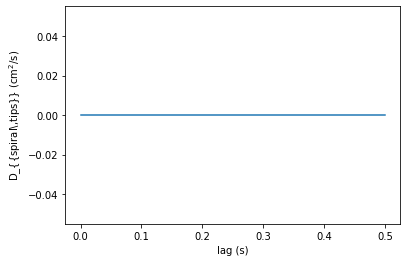

In [115]:
#fit spline curve to the given derivative of emsd versus lag
x = emsd_avg.index.values
y = emsd_avg.values
dmsd_dlag=CubicSpline(x, y)(lag_values,1).T[0]*10**3/4
plt.plot(x/10**3,dmsd_dlag)
plt.xlabel('lag (s)')
plt.ylabel(r'D_{{spiral\,tips}} (cm$^2/$s)')
plt.show()

In [116]:
return_tips_from_txt

NameError: name 'return_tips_from_txt' is not defined

In [117]:
Dhat,Delta_Dhat,tau_min,tau_max,Rsquared,delta_tau=compute_Dhat(emsd_avg, tau_min=400, window_width=2000)
print(f"Dbar = {Dhat:.5f} +- {Delta_Dhat:.5f} cm^2/s")

Dbar = 0.00000 +- 0.00000 cm^2/s


In [8]:
diffCoef=0.0005;width=200;height=200;dsdpixel=0.025
param_fn = 'param_set_8.json'
print(f"param_fn is {param_fn}.")
param_dir = os.path.join(nb_dir,'lib/model')
param_dict = json.load(open(os.path.join(param_dir,param_fn)))
param_dict['diffCoef']=diffCoef
#get time step with external stimulus for FK model
get_time_step=fetch_get_time_step(width,height,DX=dsdpixel,DY=dsdpixel,**param_dict)
time_step=fetch_time_step(width,height,DX=dsdpixel,DY=dsdpixel,**param_dict)

param_fn is param_set_8.json.


In [9]:
fetch_get_time_step

<function lib.model.minimal_model.fetch_get_time_step(width, height, DX=0.025, DY=0.025, **param_dict)>

In [118]:
1.7/.33

5.151515151515151

In [13]:
from lib.utils.aggregate_results import *

In [8]:
aggregate_all_long_traj_in_folder

<function lib.utils.aggregate_results.aggregate_all_long_traj_in_folder(input_fn_lst, T_min=1000, L=200, DS=0.025, DT=2.0, num_individuals_thresh=1, omit_time=150, jump_thresh=20, drop_jumps=True, printing=False, **kwargs)>

# aggregate_all_long_traj_in_folder

In [25]:
    file=search_for_file()
    #FK
    # file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.0_traj_sr_400_mem_0_unwrap.csv'
    
    #LR
# file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_0.00075/trajectories_unwrap/ic001.22_traj_sr_600_mem_0_unwrap.csv'
# diffCoef=0.00075

# /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_0.0005/trajectories_unwrap/ic001.23_traj_sr_600_mem_0_unwrap.csv
# diffCoef=0.0005

# /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8/trajectories_unwrap/ic001.21_traj_sr_600_mem_0_unwrap.csv


File: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8/trajectories_unwrap/ic001.21_traj_sr_600_mem_0_unwrap.csv


In [26]:
df=pd.read_csv(file)
DT=compute_time_between_frames(df);print(f"DT={DT}")#might cause problem in output
diffCoef=0.0010


DT=2.0


In [27]:

    input_fn_lst = get_all_files_matching_pattern(file,trgt='_unwrap.csv')
    print(len(input_fn_lst))
    omit_time=0#ms
    DS=0.025#cm/pixel
    L=200#pixels
#     DT=2.
    T_min=500#ms
    num_individuals_thresh=1
    jump_thresh=100

    traj=aggregate_all_long_traj_in_folder(input_fn_lst,T_min=T_min,L=L,DS=DS,DT=DT,
                                      num_individuals_thresh=num_individuals_thresh,omit_time=omit_time,
                                      jump_thresh=jump_thresh,drop_jumps=True,printing=True)#,**kwargs)
    #save output
    save_folder=os.path.dirname(os.path.dirname(file))
    output_file_name = f"all_traj_longer_than_{T_min}.csv"
    os.chdir(save_folder)
    traj.to_csv(output_file_name, index=False)
    print (traj)
    print(f"output saved in {os.path.abspath(output_file_name)}")


157
the number of jumps in particle # 738 was 1
the number of jumps in particle # 1545 was 1
the number of jumps in particle # 1716 was 1
the number of jumps in particle # 2439 was 1
the number of jumps in particle # 2823 was 1
the number of jumps in particle # 3484 was 1
the number of jumps in particle # 4423 was 1
the number of jumps in particle # 4760 was 1
the number of jumps in particle # 4970 was 1
the number of jumps in particle # 5124 was 1
the number of jumps in particle # 6231 was 1
the number of jumps in particle # 6590 was 1
the number of jumps in particle # 6966 was 1
the number of jumps in particle # 8516 was 1
the number of jumps in particle # 9263 was 1
final pid_counter value is 9804
total number of individuals is 437
constant DT? True
9804
           t           x           y  frame  particle
550    134.1    0.000000    0.000000     17         6
551    136.1   -2.089794   -9.427566     18         6
552    138.1   -2.244943  -13.256670     19         6
553    140.1   -

# compute_mean_emsd
- TODO: copy previous plots for D?
- TODO: compute D versus diffCoef (LR)
- TODO: compute D versus K_0 (LR)


In [28]:
diffCoef=0.001
file=f'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_{diffCoef}/all_traj_longer_than_500.csv'

In [69]:
file_lst=[]
diffCoef_lst=[0.001,0.00075,0.0005]
for diffCoef in diffCoef_lst:
    file=f'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_{diffCoef}/all_traj_longer_than_500.csv'
    file_lst.append(file)

In [155]:
DT=2.
df_output_lst=[]
for diffCoef,file in zip(diffCoef_lst,file_lst):
    traj=pd.read_csv(file)
    DT=compute_time_between_frames(traj);print(f"DT={DT}")
    emsd= compute_emsd(traj, DT, omit_time=0, printing=False, DS=0.025)

    pid_lst=sorted(set(traj.particle.values))
    num_individuals=len(pid_lst)
    #         lag_values,slope_values=compute_slope_vs_lag(emsd,
    T_min=500#,
    omit_time=150;window_width=100;stepsize=10




    area=(200*DS)**2#(eval(dict_params['L'])*DS)**2#cm^2
    lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=500,omit_time=150,window_width=100,stepsize=10)
#         lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=1000,omit_time=150,window_width=500,stepsize=10)
    v_rms,Delta_v_rms,_,_,Rsquared_v,_=compute_v_rms(emsd,num_points=8)
    Dhat,Delta_Dhat,tau_min,tau_max,Rsquared_D,delta_tau=compute_Dhat(emsd,tau_min=300,window_width=100)
#         Dhat,Delta_Dhat,tau_min,tau_max,Rsquared_D,delta_tau=compute_Dhat(emsd,tau_min=500,window_width=500)
    df_output=pd.DataFrame({
        'model':'luo-rudy',
        'exponent_final':slope_values[-1],
#             'exponent_500':slope_values[lag_values==.5][0],
        "DVmem":diffCoef,
        "D":[Dhat],
        "Delta_D":[Delta_Dhat],
        "v_rms":v_rms,
        "Delta_v_rms":Delta_v_rms,
        "num_individuals":num_individuals,
        "Rsquared_D":[Rsquared_D],
        "Rsquared_v":Rsquared_v,
        'area':area,

    })
    emsd_example=emsd
    print(num_individuals)
    df_output_lst.append(df_output)

DT=2.0
437
DT=2.0
649


In [77]:
len(file_lst)

3

In [78]:
pd.concat(df_output_lst)

,model,exponent_final,DVmem,D,Delta_D,v_rms,Delta_v_rms,num_individuals,Rsquared_D,Rsquared_v,area
0,luo-rudy,0.935589,0.00100,2.104207,0.008487,23.258984,0.958336,437,0.999805,0.997460,25.0
0,luo-rudy,0.976676,0.00075,1.744303,0.005152,19.035270,0.760434,1664,0.999895,0.997612,25.0
0,luo-rudy,1.006418,0.00050,1.623372,0.002931,15.389529,0.544934,381,0.999961,0.998123,25.0


# Figure: loglogplot of the emsd's for the Luo-Rudy model and the Fenton-Karma model with a known line plotted with slope=1

In [79]:
emsd

lagt
2.0      0.004431
4.0      0.010522
6.0      0.018467
8.0      0.028060
10.0     0.039176
           ...   
494.0    3.262817
496.0    3.278600
498.0    3.296295
500.0    3.314497
502.0    3.321678
Name: msd, Length: 251, dtype: float64

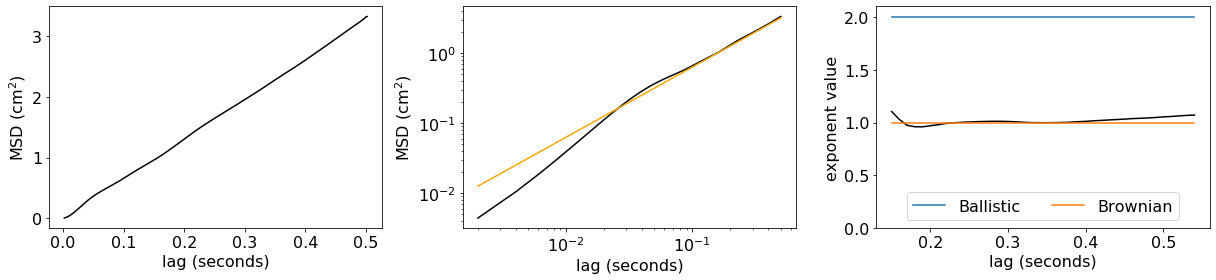

In [109]:
scale=10**2.2
saving=False
figsize=(17,4);fontsize=16
fig,axs=plt.subplots(ncols=3,figsize=figsize)
plot_emsd(axs[0],emsd,label='_Hidden', color='black',alpha=1.)
format_plot_emsd(axs[0],use_loglog=False,fontsize=fontsize)

plot_emsd(axs[1],emsd,label='_Hidden', color='black',alpha=1.)
emsd_identity=pd.Series(index=emsd.index.values,data=emsd.index.values/scale)
plot_emsd(axs[1],emsd_identity,label='_Hidden', color='orange',alpha=1.)#plot line with slope=1
format_plot_emsd(axs[1],use_loglog=True,fontsize=fontsize)

lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=700,omit_time=150,window_width=300,stepsize=10)
# lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=1000,omit_time=150,window_width=1000,stepsize=10)
plot_slope_of_emsd(axs[2],lag_values,slope_values,label='_Hidden', color='black', alpha=1.,plot_reference_lines=True)

format_slope_of_emsd(axs[2],fontsize=fontsize,use_loglog=False,loc='lower center')
axs[2].set_ylim(0,2.1)
if not saving:
    plt.tight_layout()
    plt.show()
else:
    # savefig_folder=os.path.join(nb_dir,'Figures/msd_exponents')
    # os.chdir(save_folder)
    # savefig_fn='cloud_results_lr_versus_diffCoef_versus_area.png'
    # # savefig_fn='cloud_results_fk_versus_diffCoef_versus_area.png'
    #plot emsd and exponent for given pd.DataFrame instance named emsd
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

In [113]:
#get LR model results for 2 diffcoef settings
file_lst=[]
diffCoef_lst=[0.001,0.0005]
for diffCoef in diffCoef_lst:
    file=f'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_{diffCoef}/all_traj_longer_than_500.csv'
    file_lst.append(file)

In [114]:
#get FK model results for 2 diffcoef settings
# file_lst=[]
diffCoef_lst=[0.001,0.0005]
for diffCoef in diffCoef_lst:
    file=f'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffcoef_{diffCoef}/all_traj_longer_than_1000.csv'
    file_lst.append(file)

In [121]:
file_lst[3]='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/all_traj_longer_than_1000.csv'

In [122]:
diffCoef_lst=[0.001,0.0005,0.001,0.0005]
model_lst=['Luo-Rudy','Luo-Rudy','Fenton-Karma', 'Fenton-Karma']
print(len(file_lst))

4


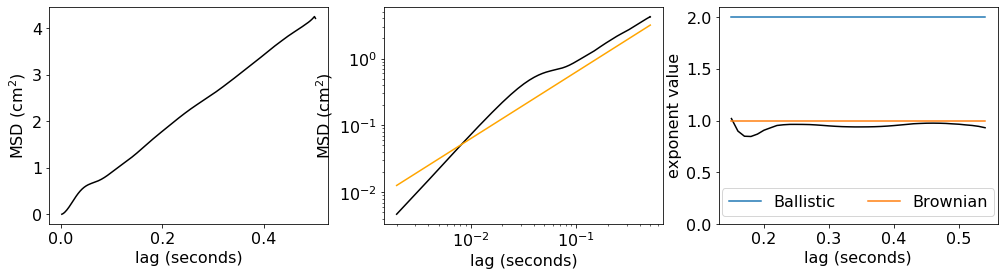

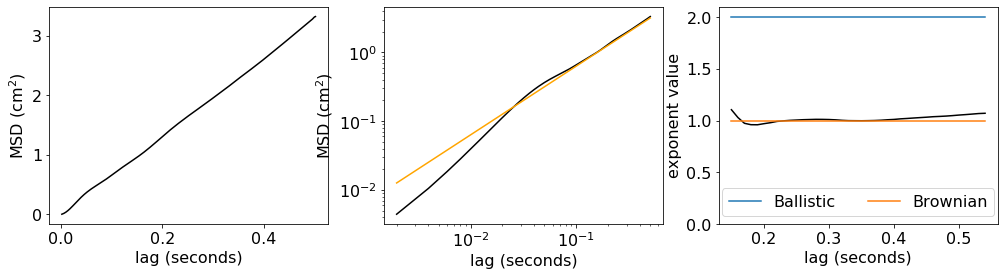

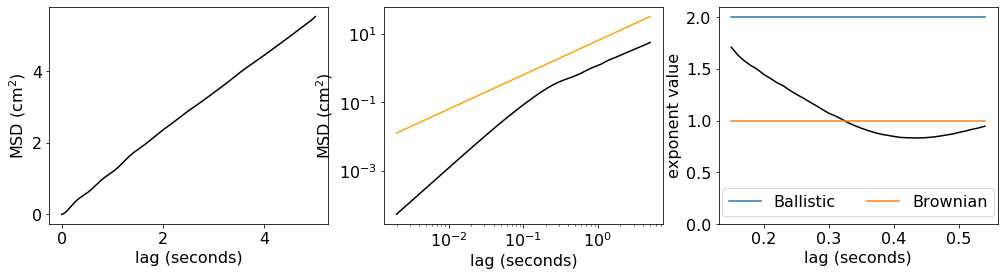

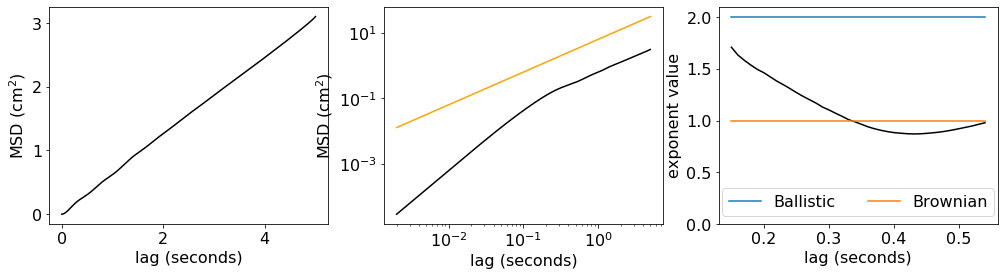

In [123]:
for diffCoef,model,file in zip(diffCoef_lst,model_lst,file_lst):
    #compute results
    DT=2.
    traj=pd.read_csv(file)
    emsd= compute_emsd(traj, DT, omit_time=0, printing=False, DS=0.025)

    pid_lst=sorted(set(traj.particle.values))
    num_individuals=len(pid_lst)
    
    #plot results
    scale=10**2.2
    saving=False
    figsize=(17,4);fontsize=16
    fig,axs=plt.subplots(ncols=3,figsize=figsize)
    plot_emsd(axs[0],emsd,label='_Hidden', color='black',alpha=1.)
    format_plot_emsd(axs[0],use_loglog=False,fontsize=fontsize)

    plot_emsd(axs[1],emsd,label='_Hidden', color='black',alpha=1.)
    emsd_identity=pd.Series(index=emsd.index.values,data=emsd.index.values/scale)
    plot_emsd(axs[1],emsd_identity,label='_Hidden', color='orange',alpha=1.)#plot line with slope=1
    format_plot_emsd(axs[1],use_loglog=True,fontsize=fontsize)

    lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=700,omit_time=150,window_width=300,stepsize=10)
    # lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=1000,omit_time=150,window_width=1000,stepsize=10)
    plot_slope_of_emsd(axs[2],lag_values,slope_values,label='_Hidden', color='black', alpha=1.,plot_reference_lines=True)

    format_slope_of_emsd(axs[2],fontsize=fontsize,use_loglog=False,loc='lower center')
    axs[2].set_ylim(0,2.1)
plt.show()

In [ ]:
# search_for_file()

# make Figures for manuscript

In [124]:
#get LR model results for 2 diffcoef settings
file_lst=[]
diffCoef_lst=[0.001]
for diffCoef in diffCoef_lst:
    file=f'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_{diffCoef}/all_traj_longer_than_500.csv'
    file_lst.append(file)

#get FK model results for 2 diffcoef settings
# file_lst=[]
diffCoef_lst=[0.001]
for diffCoef in diffCoef_lst:
    file=f'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffcoef_{diffCoef}/all_traj_longer_than_1000.csv'
    file_lst.append(file)

# file_lst[3]='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/all_traj_longer_than_1000.csv'

diffCoef_lst=[0.001,0.001]
model_lst=['Luo-Rudy', 'Fenton-Karma']
print(len(file_lst))

2


In [3]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
# from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

DT=2.0,diffCoef=0.001
DT=0.4,diffCoef=0.001


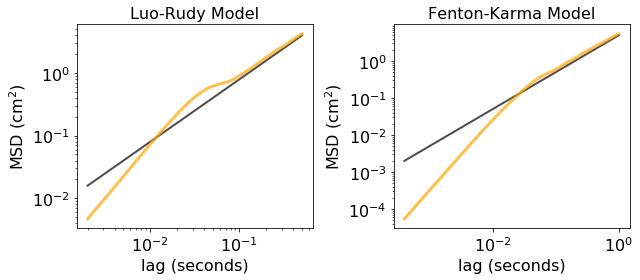

In [125]:
ax_index_lst=[0,1]
#plot results
scale_lst=[10**2.1,10**2.3]
saving=False
figsize=(9,4);fontsize=16
fig,axs=plt.subplots(ncols=2,figsize=figsize)

for diffCoef,model,scale,file,ax_index in zip(diffCoef_lst,model_lst,scale_lst,file_lst,ax_index_lst):
    #compute results
    traj=pd.read_csv(file)
    DT=compute_time_between_frames(traj)
    emsd= compute_emsd(traj, DT, omit_time=0, printing=False, DS=0.025)
    print(f"DT={DT},diffCoef={diffCoef}")

    pid_lst=sorted(set(traj.particle.values))
    num_individuals=len(pid_lst)
    

#     plot_emsd(axs[0],emsd,label='_Hidden', color='black',alpha=1.)
#     format_plot_emsd(axs[0],use_loglog=False,fontsize=fontsize)

    emsd_identity=pd.Series(index=emsd.index.values,data=emsd.index.values/scale)
    plot_emsd(axs[ax_index],emsd_identity,label='_Hidden', color='black',alpha=.7,lw=2)#plot line with slope=1
    plot_emsd(axs[ax_index],emsd,label='_Hidden', color='orange',alpha=.7,lw=3)
    format_plot_emsd(axs[ax_index],use_loglog=True,fontsize=fontsize)
    axs[ax_index].set_title(model+' Model',fontsize=fontsize)
    
if not saving:
    plt.tight_layout()
    plt.show()
else:
    plt.tight_layout()
    savefig_folder=f"{nb_dir}/Figures"
    savefig_fn='figure_msd.png'
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=400)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

In [215]:
diffCoef,model,scale,file,ax_index = list( zip(diffCoef_lst,model_lst,scale_lst,file_lst,ax_index_lst))[0]
#compute results
traj=pd.read_csv(file)
DT=compute_time_between_frames(traj)
emsd= compute_emsd(traj, DT, omit_time=0, printing=False, DS=0.025)
print(f"DT={DT},diffCoef={diffCoef}")

#compute error bars
traj['src']=traj['particle']
src_lst = sorted(set(traj.src.values))
dict_out_lst=[]
for src in src_lst:
    emsd_individual= pd.DataFrame(compute_emsd(traj[traj.src==src].copy(), DT, omit_time=0, printing=False, DS=0.025)
                                 ).reset_index()
    emsd_individual['src']=src
    dict_out_lst.append(emsd_individual)
df = pd.concat(dict_out_lst)
df.reset_index(inplace=True,drop=True)
# t_values, msd_values, std_values = compute_average_std_msd(df,DT)
# ax.fill_between(t_values,msd_values-std_values,msd_values+std_values,color=colorB, alpha=0.3,step='post')

# ax.plot(t_values,msd_values,c=colorB,lw=2)

DT=2.0,diffCoef=0.001


In [216]:
src_lst = sorted(set(df.src.values))
ff = df.copy()#pd.concat([df[df.src==src] for src in src_lst])
dt = DT#/10**3 #seconds per frame
t_values = np.array(sorted(set(ff.lagt.values)))
t_values = np.arange(np.min(t_values),np.max(t_values),dt)
# averaging msd over trials
msd_lst = []
std_lst = []
yerr1_lst=[]
yerr2_lst=[]
for t in t_values:
    #this binning is robust to floating point error
    boo = (ff.lagt>=t-dt/2)&(ff.lagt<=t+dt/2)
    msd_vals=ff[boo].msd
    msd_lst.append(msd_vals.mean())
    std_lst.append(msd_vals.std())
    yerr1_lst.append(msd_vals.quantile(0.25))#0.025))
    yerr2_lst.append(msd_vals.quantile(0.75))#1-0.025))
terr_values = t_values/10**3
msd_values = np.array(msd_lst)
std_values = np.array(std_lst)
yerr1_values = np.array(yerr1_lst)
yerr2_values = np.array(yerr2_lst)


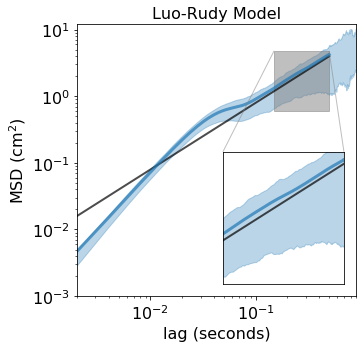

In [218]:
ax_index_lst=[0,0]
magnification=2.2
x1, x2, y1, y2 = .15,.5,.6,4.8
#plot results
scale_lst=[10**2.1,10**2.3]
saving=False
figsize=(5,5);fontsize=16
fig,ax=plt.subplots(ncols=1,figsize=figsize)

ax.fill_between(terr_values,yerr1_values,yerr2_values,color='C0', alpha=0.3)

pid_lst=sorted(set(traj.particle.values))
num_individuals=len(pid_lst)
emsd_identity=pd.Series(index=emsd.index.values,data=emsd.index.values/scale)

plot_emsd(ax,emsd_identity,label='_Hidden', color='black',alpha=.7,lw=2)#plot line with slope=1
plot_emsd(ax,emsd,label='_Hidden', color='C0',alpha=.7,lw=3)
format_plot_emsd(ax,use_loglog=True,fontsize=fontsize)
ax.set_title(model+' Model',fontsize=fontsize)
ax.set_xlim([0.002,.9])
ax.set_ylim([1e-3,12])

#TODO: plot zoom-in of long timescales with an inset
# axins = [zoomed_inset_axes(ax, zoom=0.5, loc='lower right') for ax in axs]
axins=zoomed_inset_axes(ax, magnification, loc='lower right',borderpad=1.2) 

#      # fix the number of ticks on the inset axes
axins.fill_between(terr_values,yerr1_values,yerr2_values,color='C0', alpha=0.3)
plot_emsd(axins,emsd_identity,label='_Hidden', color='black',alpha=.7,lw=2)#plot line with slope=1
plot_emsd(axins,emsd,label='_Hidden', color='C0',alpha=.7,lw=3)
# format_plot_emsd(axins,use_loglog=True,fontsize=fontsize)

# for ax,axins in zip(axs,axins_lst): 
#     x1, x2, y1, y2 = .1,.8,1,6
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xscale('log')
axins.set_yscale('log')

# axins.xaxis.set_ticks([x1,x2])
# axins.axis('off')
# for child in axins.get_children():
#     if isinstance(child, matplotlib.spines.Spine):
#         child.set_color('#dddddd')
    
# axins.xaxis.set_ticklabels([])#x1,x2])
axins.xaxis.set_visible(False)
axins.yaxis.set_visible(False)
mark_inset(ax, axins, loc1=2, loc2=1, fc="gray", ec="0.5",alpha=0.5)
# fix the number of ticks on the inset axes
# axins.yaxis.get_major_locator().set_params(nbins=7)
# axins.xaxis.get_major_locator().set_params(nbins=7)

# plt.setp(axins.get_xticklabels(), visible=False)
# plt.setp(axins.get_yticklabels(), visible=False)


if not saving:
#     plt.tight_layout()
    plt.show()
else:
#     plt.tight_layout()
    savefig_folder=f"{nb_dir}/Figures"
    savefig_fn='figure_msd_a.png'
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=400)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

In [210]:
diffCoef,model,scale,file,ax_index = list( zip(diffCoef_lst,model_lst,scale_lst,file_lst,ax_index_lst))[1]
#compute results
traj=pd.read_csv(file)
DT=compute_time_between_frames(traj)
emsd= compute_emsd(traj, DT, omit_time=0, printing=False, DS=0.025)
print(f"DT={DT},diffCoef={diffCoef}")

#compute error bars
traj['src']=traj['particle']
src_lst = sorted(set(traj.src.values))
dict_out_lst=[]
for src in src_lst:
    emsd_individual= pd.DataFrame(compute_emsd(traj[traj.src==src].copy(), DT, omit_time=0, printing=False, DS=0.025)
                                 ).reset_index()
    emsd_individual['src']=src
    dict_out_lst.append(emsd_individual)
df = pd.concat(dict_out_lst)
df.reset_index(inplace=True,drop=True)

src_lst = sorted(set(df.src.values))
ff = df.copy()#pd.concat([df[df.src==src] for src in src_lst])
dt = DT#/10**3 #seconds per frame
t_values = np.array(sorted(set(ff.lagt.values)))
t_values = np.arange(np.min(t_values),np.max(t_values),dt)
# averaging msd over trials
msd_lst = []
std_lst = []
yerr1_lst=[]
yerr2_lst=[]
for t in t_values:
    #this binning is robust to floating point error
    boo = (ff.lagt>=t-dt/2)&(ff.lagt<=t+dt/2)
    msd_vals=ff[boo].msd
    msd_lst.append(msd_vals.mean())
    std_lst.append(msd_vals.std())
    yerr1_lst.append(msd_vals.quantile(0.25))#0.025))
    yerr2_lst.append(msd_vals.quantile(0.75))#1-0.025))
terr_values = t_values/10**3
msd_values = np.array(msd_lst)
std_values = np.array(std_lst)
yerr1_values = np.array(yerr1_lst)
yerr2_values = np.array(yerr2_lst)


DT=0.4,diffCoef=0.001


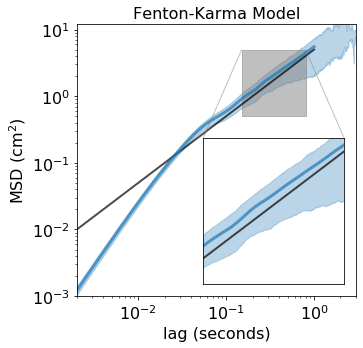

In [214]:
ax_index_lst=[0,0]
magnification=2.2
# x1, x2, y1, y2 = .15,.5,.6,4.8
x1, x2, y1, y2 = .15,.8,.5,5

#plot results
scale_lst=[10**2.1,10**2.3]
saving=False
figsize=(5,5);fontsize=16
fig,ax=plt.subplots(ncols=1,figsize=figsize)

ax.fill_between(terr_values,yerr1_values,yerr2_values,color='C0', alpha=0.3)

pid_lst=sorted(set(traj.particle.values))
num_individuals=len(pid_lst)
emsd_identity=pd.Series(index=emsd.index.values,data=emsd.index.values/scale)

plot_emsd(ax,emsd_identity,label='_Hidden', color='black',alpha=.7,lw=2)#plot line with slope=1
plot_emsd(ax,emsd,label='_Hidden', color='C0',alpha=.7,lw=3)
format_plot_emsd(ax,use_loglog=True,fontsize=fontsize)
ax.set_title(model+' Model',fontsize=fontsize)
ax.set_xlim([0.002,3])#.9])
ax.set_ylim([1e-3,12])
#TODO: plot zoom-in of long timescales with an inset
# axins = [zoomed_inset_axes(ax, zoom=0.5, loc='lower right') for ax in axs]
axins=zoomed_inset_axes(ax, magnification, loc='lower right',borderpad=1.2) 

#      # fix the number of ticks on the inset axes
axins.fill_between(terr_values,yerr1_values,yerr2_values,color='C0', alpha=0.3)
plot_emsd(axins,emsd_identity,label='_Hidden', color='black',alpha=.7,lw=2)#plot line with slope=1
plot_emsd(axins,emsd,label='_Hidden', color='C0',alpha=.7,lw=3)
# format_plot_emsd(axins,use_loglog=True,fontsize=fontsize)

# for ax,axins in zip(axs,axins_lst): 
#     x1, x2, y1, y2 = .1,.8,1,6
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xscale('log')
axins.set_yscale('log')

# axins.xaxis.set_ticks([x1,x2])
# axins.axis('off')
# for child in axins.get_children():
#     if isinstance(child, matplotlib.spines.Spine):
#         child.set_color('#dddddd')
    
# axins.xaxis.set_ticklabels([])#x1,x2])
axins.xaxis.set_visible(False)
axins.yaxis.set_visible(False)
mark_inset(ax, axins, loc1=2, loc2=1, fc="gray", ec="0.5",alpha=0.5)
# fix the number of ticks on the inset axes
# axins.yaxis.get_major_locator().set_params(nbins=7)
# axins.xaxis.get_major_locator().set_params(nbins=7)

# plt.setp(axins.get_xticklabels(), visible=False)
# plt.setp(axins.get_yticklabels(), visible=False)


if not saving:
#     plt.tight_layout()
    plt.show()
else:
#     plt.tight_layout()
    savefig_folder=f"{nb_dir}/Figures"
    savefig_fn='figure_msd_a.png'
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=400)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

In [219]:
# ax_index_lst=[0,0]
# magnification=2.2
# x1, x2, y1, y2 = .1,.8,.5,5
# #plot results
# scale_lst=[10**2.1,10**2.3]
# saving=False
# figsize=(5,5);fontsize=16
# fig,ax=plt.subplots(ncols=1,figsize=figsize)

# #TODO: plot zoom-in of long timescales with an inset
# # axins = [zoomed_inset_axes(ax, zoom=0.5, loc='lower right') for ax in axs]
# axins=zoomed_inset_axes(ax, magnification, loc='lower right',borderpad=1.2) 

# diffCoef,model,scale,file,ax_index = list( zip(diffCoef_lst,model_lst,scale_lst,file_lst,ax_index_lst))[1]
# #compute results
# traj=pd.read_csv(file)
# DT=compute_time_between_frames(traj)
# emsd= compute_emsd(traj, DT, omit_time=0, printing=False, DS=0.025)
# print(f"DT={DT},diffCoef={diffCoef}")

# pid_lst=sorted(set(traj.particle.values))
# num_individuals=len(pid_lst)


# #     plot_emsd(axs[0],emsd,label='_Hidden', color='black',alpha=1.)
# #     format_plot_emsd(axs[0],use_loglog=False,fontsize=fontsize)

# emsd_identity=pd.Series(index=emsd.index.values,data=emsd.index.values/scale)
# plot_emsd(ax,emsd_identity,label='_Hidden', color='black',alpha=.7,lw=2)#plot line with slope=1
# plot_emsd(ax,emsd,label='_Hidden', color='C0',alpha=.7,lw=3)
# format_plot_emsd(ax,use_loglog=True,fontsize=fontsize)
# ax.set_title(model+' Model',fontsize=fontsize)

# #      # fix the number of ticks on the inset axes
# plot_emsd(axins,emsd_identity,label='_Hidden', color='black',alpha=.7,lw=2)#plot line with slope=1
# plot_emsd(axins,emsd,label='_Hidden', color='C0',alpha=.7,lw=3)
# # format_plot_emsd(axins,use_loglog=True,fontsize=fontsize)

# # for ax,axins in zip(axs,axins_lst): 
# #     x1, x2, y1, y2 = .1,.8,1,6
# axins.set_xlim(x1, x2)
# axins.set_ylim(y1, y2)
# mark_inset(ax, axins, loc1=2, loc2=1, fc="gray", ec="0.5",alpha=0.5)
# # fix the number of ticks on the inset axes
# axins.yaxis.get_major_locator().set_params(nbins=7)
# axins.xaxis.get_major_locator().set_params(nbins=7)

# # axins.set_xscale('log')
# # axins.set_yscale('log')

# plt.setp(axins.get_xticklabels(), visible=False)
# plt.setp(axins.get_yticklabels(), visible=False)


# if not saving:
# #     plt.tight_layout()
#     plt.show()
# else:
# #     plt.tight_layout()
#     savefig_folder=f"{nb_dir}/Figures"
#     savefig_fn='figure_msd_b.png'
#     os.chdir(savefig_folder)
#     plt.savefig(savefig_fn, dpi=400)
#     print(f"saved figure in \n\t{savefig_fn}")
# #     plt.close()

In [67]:
axins.yaxis.set_

In [3]:
ax_index_lst=[0,1]
#plot results
scale_lst=[10**2.1,10**2.3]
saving=True
figsize=(9,4);fontsize=16
fig,axs=plt.subplots(ncols=2,figsize=figsize)

for diffCoef,model,scale,file,ax_index in zip(diffCoef_lst,model_lst,scale_lst,file_lst,ax_index_lst):
    #compute results
    traj=pd.read_csv(file)
    DT=compute_time_between_frames(traj)
    emsd= compute_emsd(traj, DT, omit_time=0, printing=False, DS=0.025)

    pid_lst=sorted(set(traj.particle.values))
    num_individuals=len(pid_lst)
    print(f"DT={DT},diffCoef={diffCoef},num_individuals={num_individuals}")

#     plot_emsd(axs[0],emsd,label='_Hidden', color='black',alpha=1.)
#     format_plot_emsd(axs[0],use_loglog=False,fontsize=fontsize)

#     emsd_identity=pd.Series(index=emsd.index.values,data=emsd.index.values/scale)
#     plot_emsd(axs[ax_index],emsd_identity,label='_Hidden', color='black',alpha=.7,lw=2)#plot line with slope=1
#     plot_emsd(axs[ax_index],emsd,label='_Hidden', color='orange',alpha=.7,lw=3)
#     format_plot_emsd(axs[ax_index],use_loglog=True,fontsize=fontsize)
    axs[ax_index].set_title(model+' Model',fontsize=fontsize)
    if ax_index==0:
        lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=700,omit_time=150,window_width=500,stepsize=10)
#         lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=700,omit_time=150,window_width=20,stepsize=10)
    if ax_index==1:
        lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=1200,omit_time=150,window_width=1000,stepsize=10)
#         lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=1200,omit_time=150,window_width=20,stepsize=10)
    plot_slope_of_emsd(axs[ax_index],lag_values,slope_values,label='_Hidden',plot_reference_lines=True, color='orange',alpha=.7,lw=3)
    format_slope_of_emsd(axs[ax_index],fontsize=fontsize,use_loglog=False,ncol_legend=1,loc='upper right')#,loc='lower center')
    axs[ax_index].set_ylim(0,2.05)
#     axs[ax_index].set_xlim(0,.4)
    axs[ax_index].set_ylabel(r'$\nu$',fontsize=fontsize+2)
if not saving:
    plt.tight_layout()
    plt.show()
else:
    plt.tight_layout()
    savefig_folder=f"{nb_dir}/Figures"
    savefig_fn='figure_2.pdf'
#     savefig_fn='figure_2_b.png'
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=400)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

NameError: name 'plt' is not defined

DT=2.0,diffCoef=0.001,num_individuals=437
DT=0.4,diffCoef=0.001,num_individuals=649
saved figure in 
	figure_2_b.pdf


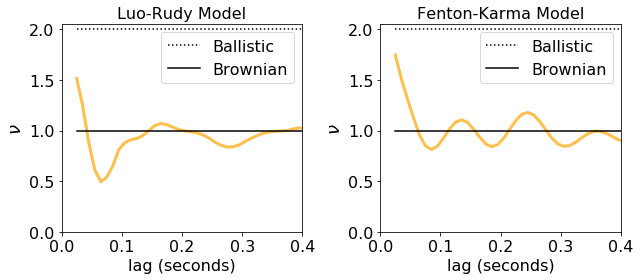

In [308]:
ax_index_lst=[0,1]
#plot results
scale_lst=[10**2.1,10**2.3]
saving=True
figsize=(9,4);fontsize=16
fig,axs=plt.subplots(ncols=2,figsize=figsize)

for diffCoef,model,scale,file,ax_index in zip(diffCoef_lst,model_lst,scale_lst,file_lst,ax_index_lst):
    #compute results
    traj=pd.read_csv(file)
    DT=compute_time_between_frames(traj)
    emsd= compute_emsd(traj, DT, omit_time=0, printing=False, DS=0.025)

    pid_lst=sorted(set(traj.particle.values))
    num_individuals=len(pid_lst)
    print(f"DT={DT},diffCoef={diffCoef},num_individuals={num_individuals}")

#     plot_emsd(axs[0],emsd,label='_Hidden', color='black',alpha=1.)
#     format_plot_emsd(axs[0],use_loglog=False,fontsize=fontsize)

#     emsd_identity=pd.Series(index=emsd.index.values,data=emsd.index.values/scale)
#     plot_emsd(axs[ax_index],emsd_identity,label='_Hidden', color='black',alpha=.7,lw=2)#plot line with slope=1
#     plot_emsd(axs[ax_index],emsd,label='_Hidden', color='orange',alpha=.7,lw=3)
#     format_plot_emsd(axs[ax_index],use_loglog=True,fontsize=fontsize)
    axs[ax_index].set_title(model+' Model',fontsize=fontsize)
    if ax_index==0:
#         lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=700,omit_time=150,window_width=500,stepsize=10)
        lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=700,omit_time=150,window_width=50,stepsize=10)
    if ax_index==1:
#         lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=1200,omit_time=150,window_width=1000,stepsize=10)
        lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=1200,omit_time=150,window_width=50,stepsize=10)
    plot_slope_of_emsd(axs[ax_index],lag_values,slope_values,label='_Hidden',plot_reference_lines=True, color='orange',alpha=.7,lw=3)
    format_slope_of_emsd(axs[ax_index],fontsize=fontsize,use_loglog=False,ncol_legend=1,loc='upper right')#,loc='lower center')
    axs[ax_index].set_ylim(0,2.05)
    axs[ax_index].set_xlim(0,.4)
    axs[ax_index].set_ylabel(r'$\nu$',fontsize=fontsize+2)
if not saving:
    plt.tight_layout()
    plt.show()
else:
    plt.tight_layout()
    savefig_folder=f"{nb_dir}/Figures"
#     savefig_fn='figure_2.pdf'
    savefig_fn='figure_2_b.pdf'
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=400)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

# plot the effect of diffCoef on MSD 

In [309]:
#TODO: plot effect of diffCoef from violin plots as box and whisker plots


In [12]:
#get LR model results for 2 diffcoef settings
file_lst=[]
diffCoef_lst=[0.0005,0.001]
for diffCoef in diffCoef_lst:
    file=f'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_{diffCoef}/all_traj_longer_than_500.csv'
    file_lst.append(file)

#get FK model results for 2 diffcoef settings
# file_lst=[]
diffCoef_lst=[0.0005,0.001]
for diffCoef in diffCoef_lst:
    file=  f'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffcoef_{diffCoef}/all_traj_longer_than_1000.csv'
    file_lst.append(file)

# file_lst[4]='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/all_traj_longer_than_1000.csv'
file_lst[2]='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/all_traj_longer_than_1000.csv'
diffCoef_lst=[0.0005,0.001,0.0005,0.001]
model_lst=['Luo-Rudy','Luo-Rudy', 'Luo-Rudy','Fenton-Karma','Fenton-Karma','Fenton-Karma']
print(len(file_lst))

4


DT=2.0,diffCoef=0.0005,num_individuals=381, color=orange
DT=2.0,diffCoef=0.001,num_individuals=437, color=blue
DT=0.4,diffCoef=0.0005,num_individuals=4064, color=orange
DT=0.4,diffCoef=0.001,num_individuals=649, color=blue
saved figure in 
	figure_3_prime_prime.pdf


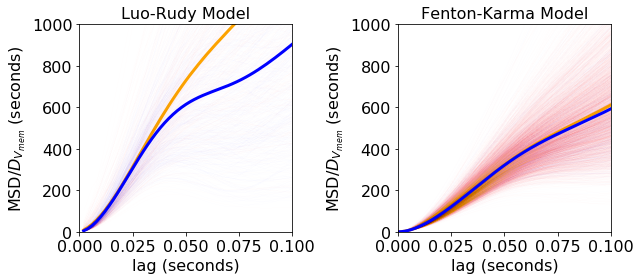

In [13]:
#Compute ensemble-averaged diffusion coefficient of spiral tips
ax_index_lst=[0,0,1,1]
color_lst=['orange','blue','orange','blue']
#plot results
# scale_lst=[10**2.1,10**2.99]
saving=True
figsize=(9,4);fontsize=16
fig,axs=plt.subplots(ncols=2,figsize=figsize)

D_lst_lst=[]
v_rms_lst_lst=[]
for diffCoef,model,file,ax_index,color in zip(diffCoef_lst,model_lst,file_lst,ax_index_lst,color_lst):
    #compute results
    traj=pd.read_csv(file)
    DT=compute_time_between_frames(traj)
    emsd= compute_emsd(traj, DT, omit_time=0, printing=False, DS=0.025)
    
    pid_lst=sorted(set(traj.particle.values))
    num_individuals=len(pid_lst)
    print(f"DT={DT},diffCoef={diffCoef},num_individuals={num_individuals}, color={color}")

    D_lst=[]
    v_rms_lst=[]
    for pid in pid_lst:
        e=compute_emsd(traj[traj.particle==pid].copy(), DT, omit_time=0, printing=False, DS=0.025)
        #compute D
        Dhat,Delta_Dhat,tau_min,tau_max,Rsquared,delta_tau=compute_Dhat(e/diffCoef,tau_min=150,window_width=100)
        #append D to D_lst
        D_lst.append(Dhat)
        #compute v_rms
        v_rms,Delta_v_rms,_,window_width,Rsquared,window_width=compute_v_rms(e/diffCoef,num_points=8)
        #append v_rms to v_rms_lst
        v_rms_lst.append(v_rms)
        
        #plot single particle MSD
        plot_emsd(axs[ax_index],e/diffCoef,label='_Hidden', color=color,alpha=.005,lw=1)
        
    D_values =np.array(D_lst)
    print(f'\t D = {np.mean(D_values)/10**3:.6f} +- {np.std(D_values)/10**3:.6f} cm^2/s')
    #append D_lst to D_lst_lst
    D_lst_lst.append(D_lst)
    #append v_rms_lst to v_rms_lst_lst
    v_rms_lst_lst.append(v_rms_lst)
    
    plot_emsd(axs[ax_index],emsd/diffCoef,label='_Hidden', color=color,alpha=1.0,lw=3)
    format_plot_emsd(axs[ax_index],use_loglog=False,fontsize=fontsize)
    axs[ax_index].set_title(model+' Model',fontsize=fontsize)
    xmax=0.1#np.max(emsd.index.values)/10**3
    axs[ax_index].set_xlim(0,xmax)
#     axs[ax_index].set_ylim(0,6)
    axs[ax_index].set_ylim(0,1/0.001)
    axs[ax_index].set_ylabel(r'MSD$/D_{V_{mem}}$ (seconds)')
#     emsd_identity=pd.Series(index=emsd.index.values,data=emsd.index.values/scale)
#     plot_emsd(axs[ax_index],emsd_identity,label='_Hidden', color='black',alpha=.7,lw=2)#plot line with slope=1
#     plot_emsd(axs[ax_index],emsd,label='_Hidden', color='orange',alpha=.7,lw=3)
#     format_plot_emsd(axs[ax_index],use_loglog=True,fontsize=fontsize)
#     if ax_index==0:
#         lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=700,omit_time=150,window_width=500,stepsize=10)
# #         lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=700,omit_time=150,window_width=100,stepsize=10)
#     if ax_index==1:
#         lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=1200,omit_time=150,window_width=1000,stepsize=10)
# #         lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=1200,omit_time=150,window_width=100,stepsize=10)
#     plot_slope_of_emsd(axs[ax_index],lag_values,slope_values,label='_Hidden',plot_reference_lines=True, color='orange',alpha=.7,lw=3)
#     format_slope_of_emsd(axs[ax_index],fontsize=fontsize,use_loglog=False,ncol_legend=1,loc='upper right')#,loc='lower center')
#     axs[ax_index].set_ylabel(r'$\nu$',fontsize=fontsize+2)
if not saving:
    plt.tight_layout()
    plt.show()
else:
    plt.tight_layout()
    savefig_folder=f"{nb_dir}/Figures"
    savefig_fn='figure_3_prime_prime.pdf'
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=500)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

In [15]:
for D_lst in D_lst_lst:
    y_values =np.array(D_lst)
    print(f'D = {np.mean(y_values)/10**3:.6f} +- {np.std(y_values)/10**3:.6f} cm^2/s')
beep(5)

D = 3.484161 +- 4.127463 cm^2/s
D = 2.269802 +- 2.951285 cm^2/s
D = 1.563198 +- 1.126302 cm^2/s
D = 1.421139 +- 1.134446 cm^2/s


0

DT=2.0,diffCoef=0.0005,num_individuals=381, color=C0
DT=2.0,diffCoef=0.001,num_individuals=437, color=orange
DT=0.4,diffCoef=0.0005,num_individuals=4064, color=C0
DT=0.4,diffCoef=0.001,num_individuals=649, color=orange
saved figure in 
	figure_3_prime.pdf


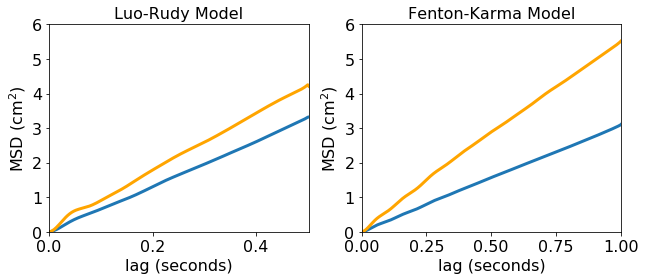

In [120]:
ax_index_lst=[0,0,1,1]
color_lst=['C0','orange','C0','orange']
#plot results
# scale_lst=[10**2.1,10**2.99]
Rsquared_thresh_D=0.99
Rsquared_thresh_v=0.99
saving=True
figsize=(9,4);fontsize=16
fig,axs=plt.subplots(ncols=2,figsize=figsize)

D_lst_lst=[]
v_rms_lst_lst=[]
for diffCoef,model,file,ax_index,color in zip(diffCoef_lst,model_lst,file_lst,ax_index_lst,color_lst):
    #compute results
    traj=pd.read_csv(file)
    DT=compute_time_between_frames(traj)
    emsd= compute_emsd(traj, DT, omit_time=0, printing=False, DS=0.025)
    
    pid_lst=sorted(set(traj.particle.values))
    num_individuals=len(pid_lst)
    print(f"DT={DT},diffCoef={diffCoef},num_individuals={num_individuals}, color={color}")

    D_lst=[]
    v_rms_lst=[]
    for pid in pid_lst:
        e=compute_emsd(traj[traj.particle==pid].copy(), DT, omit_time=0, printing=False, DS=0.025)
        #compute D
        Dhat,Delta_Dhat,tau_min,tau_max,Rsquared,delta_tau=compute_Dhat(e,tau_min=150,window_width=100)
        #append D to D_lst
        if Rsquared>Rsquared_thresh_D:
            D_lst.append(Dhat)
        #compute v_rms
        v_rms,Delta_v_rms,_,window_width,Rsquared,window_width=compute_v_rms(e,num_points=8)
        #append v_rms to v_rms_lst
        if Rsquared>Rsquared_thresh_v:
            v_rms_lst.append(v_rms)
        
        #plot single particle MSD
#         plot_emsd(axs[ax_index],e,label='_Hidden', color=color,alpha=.005,lw=1)
    #append D_lst to D_lst_lst
    D_lst_lst.append(D_lst)
    #append v_rms_lst to v_rms_lst_lst
    v_rms_lst_lst.append(v_rms_lst)
    
    plot_emsd(axs[ax_index],emsd,label='_Hidden', color=color,alpha=1.0,lw=3)
    format_plot_emsd(axs[ax_index],use_loglog=False,fontsize=fontsize)
    axs[ax_index].set_title(model+' Model',fontsize=fontsize)
    xmax=np.max(emsd.index.values)/10**3
    axs[ax_index].set_xlim(0,xmax)
    axs[ax_index].set_ylim(0,6)
#     emsd_identity=pd.Series(index=emsd.index.values,data=emsd.index.values/scale)
#     plot_emsd(axs[ax_index],emsd_identity,label='_Hidden', color='black',alpha=.7,lw=2)#plot line with slope=1
#     plot_emsd(axs[ax_index],emsd,label='_Hidden', color='orange',alpha=.7,lw=3)
#     format_plot_emsd(axs[ax_index],use_loglog=True,fontsize=fontsize)
#     if ax_index==0:
#         lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=700,omit_time=150,window_width=500,stepsize=10)
# #         lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=700,omit_time=150,window_width=100,stepsize=10)
#     if ax_index==1:
#         lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=1200,omit_time=150,window_width=1000,stepsize=10)
# #         lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=1200,omit_time=150,window_width=100,stepsize=10)
#     plot_slope_of_emsd(axs[ax_index],lag_values,slope_values,label='_Hidden',plot_reference_lines=True, color='orange',alpha=.7,lw=3)
#     format_slope_of_emsd(axs[ax_index],fontsize=fontsize,use_loglog=False,ncol_legend=1,loc='upper right')#,loc='lower center')
#     axs[ax_index].set_ylabel(r'$\nu$',fontsize=fontsize+2)
if not saving:
    plt.tight_layout()
    plt.show()
else:
    plt.tight_layout()
    savefig_folder=f"{nb_dir}/Figures"
    savefig_fn='figure_3_prime.pdf'
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=500)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

In [454]:
df=pd.DataFrame(emsd).reset_index()
df['src']=0

In [ ]:
df.head()
beep(3)

DT=2.0,diffCoef=0.0005,num_individuals=381, color=C0
DT=2.0,diffCoef=0.001,num_individuals=437, color=orange
DT=0.4,diffCoef=0.0005,num_individuals=4064, color=C0
DT=0.4,diffCoef=0.001,num_individuals=649, color=orange


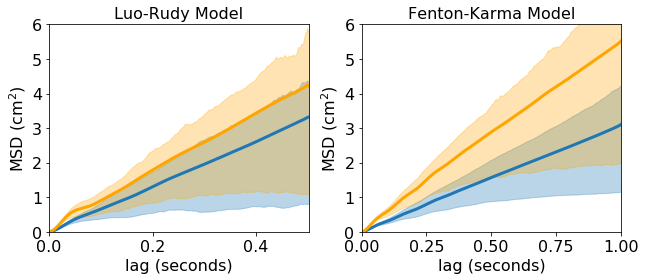

In [223]:
ax_index_lst=[0,0,1,1]
color_lst=['C0','orange','C0','orange']
#plot results
# scale_lst=[10**2.1,10**2.99]
Rsquared_thresh_D=0.99
Rsquared_thresh_v=0.99
saving=False
figsize=(9,4);fontsize=16
fig,axs=plt.subplots(ncols=2,figsize=figsize)

D_lst_lst=[]
v_rms_lst_lst=[]
for diffCoef,model,file,ax_index,color in zip(diffCoef_lst,model_lst,file_lst,ax_index_lst,color_lst):
    #compute results
    traj=pd.read_csv(file)
    DT=compute_time_between_frames(traj)
    emsd= compute_emsd(traj, DT, omit_time=0, printing=False, DS=0.025)
    pid_lst=sorted(set(traj.particle.values))
    num_individuals=len(pid_lst)
    print(f"DT={DT},diffCoef={diffCoef},num_individuals={num_individuals}, color={color}")

    #compute error bars
    traj['src']=traj['particle']
    src_lst = sorted(set(traj.src.values))
    dict_out_lst=[]
    for src in src_lst:
        emsd_individual= pd.DataFrame(compute_emsd(traj[traj.src==src].copy(), DT, omit_time=0, printing=False, DS=0.025)
                                     ).reset_index()
        emsd_individual['src']=src
        dict_out_lst.append(emsd_individual)
    df = pd.concat(dict_out_lst)
    df.reset_index(inplace=True,drop=True)

    src_lst = sorted(set(df.src.values))
    ff = df.copy()#pd.concat([df[df.src==src] for src in src_lst])
    dt = DT#/10**3 #seconds per frame
    t_values = np.array(sorted(set(ff.lagt.values)))
    t_values = np.arange(np.min(t_values),np.max(t_values),dt)
    # averaging msd over trials
    msd_lst = []
    std_lst = []
    yerr1_lst=[]
    yerr2_lst=[]
    for t in t_values:
        #this binning is robust to floating point error
        boo = (ff.lagt>=t-dt/2)&(ff.lagt<=t+dt/2)
        msd_vals=ff[boo].msd
        msd_lst.append(msd_vals.mean())
        std_lst.append(msd_vals.std())
        yerr1_lst.append(msd_vals.quantile(0.25))#0.025))
        yerr2_lst.append(msd_vals.quantile(0.75))#1-0.025))
    terr_values = t_values/10**3
    msd_values = np.array(msd_lst)
    std_values = np.array(std_lst)
    yerr1_values = np.array(yerr1_lst)
    yerr2_values = np.array(yerr2_lst)

    #plot error bars
    ax=axs[ax_index]
    ax.fill_between(terr_values,yerr1_values,yerr2_values,color=color, alpha=0.3)
    plot_emsd(axs[ax_index],emsd,label='_Hidden', color=color,alpha=1.0,lw=3)
    format_plot_emsd(axs[ax_index],use_loglog=False,fontsize=fontsize)
    axs[ax_index].set_title(model+' Model',fontsize=fontsize)
    xmax=np.max(emsd.index.values)/10**3
    axs[ax_index].set_xlim(0,xmax)
    axs[ax_index].set_ylim(0,6)
#     emsd_identity=pd.Series(index=emsd.index.values,data=emsd.index.values/scale)
#     plot_emsd(axs[ax_index],emsd_identity,label='_Hidden', color='black',alpha=.7,lw=2)#plot line with slope=1
#     plot_emsd(axs[ax_index],emsd,label='_Hidden', color='orange',alpha=.7,lw=3)
#     format_plot_emsd(axs[ax_index],use_loglog=True,fontsize=fontsize)
#     if ax_index==0:
#         lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=700,omit_time=150,window_width=500,stepsize=10)
# #         lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=700,omit_time=150,window_width=100,stepsize=10)
#     if ax_index==1:
#         lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=1200,omit_time=150,window_width=1000,stepsize=10)
# #         lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=1200,omit_time=150,window_width=100,stepsize=10)
#     plot_slope_of_emsd(axs[ax_index],lag_values,slope_values,label='_Hidden',plot_reference_lines=True, color='orange',alpha=.7,lw=3)
#     format_slope_of_emsd(axs[ax_index],fontsize=fontsize,use_loglog=False,ncol_legend=1,loc='upper right')#,loc='lower center')
#     axs[ax_index].set_ylabel(r'$\nu$',fontsize=fontsize+2)
if not saving:
    plt.tight_layout()
    plt.show()
else:
    plt.tight_layout()
    savefig_folder=f"{nb_dir}/Figures"
    savefig_fn='figure_3_prime.pdf'
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=500)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

# DONE: making figures showing distribution of MSD's for 2 values of diffCoef

# Making figures showing dependence of mean D on diffCoef
- 3 box and whisker plots with lines between their means
    - for LR model
    - for FK model

In [6]:
#get LR model results for 2 diffcoef settings
file_lst=[]
diffCoef_lst=[0.0005,0.001]
for diffCoef in diffCoef_lst:
    file=f'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_{diffCoef}/all_traj_longer_than_500.csv'
    file_lst.append(file)

#get FK model results for 2 diffcoef settings
# file_lst=[]
diffCoef_lst=[0.0005,0.001]
for diffCoef in diffCoef_lst:
    file=  f'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffcoef_{diffCoef}/all_traj_longer_than_1000.csv'
    file_lst.append(file)

# file_lst[4]='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/all_traj_longer_than_1000.csv'
file_lst[2]='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/all_traj_longer_than_1000.csv'
diffCoef_lst=[0.0005,0.001,0.0005,0.001]
model_lst=['Luo-Rudy','Luo-Rudy', 'Luo-Rudy','Fenton-Karma','Fenton-Karma','Fenton-Karma']
print(len(file_lst))

4


In [7]:
ax_index_lst=[0,0,1,1]
color_lst=['orange','red','orange','red']
# plot results
scale_lst=[10**2.1,10**2.99]
saving=True
figsize=(9,4);fontsize=16
# fig,axs=plt.subplots(ncols=2,figsize=figsize)

for diffCoef,model,file,ax_index,color in zip(diffCoef_lst,model_lst,file_lst,ax_index_lst,color_lst):
    #compute results
    traj=pd.read_csv(file)
    DT=compute_time_between_frames(traj)
    emsd= compute_emsd(traj, DT, omit_time=0, printing=False, DS=0.025)
    pid_lst=sorted(set(traj.particle.values))

In [8]:
beep(5)

0

In [10]:
#compute results
traj=pd.read_csv(file)
DT=compute_time_between_frames(traj)
emsd= compute_emsd(traj, DT, omit_time=0, printing=False, DS=0.025)

pid_lst=sorted(set(traj.particle.values))
num_individuals=len(pid_lst)
print(f"DT={DT},diffCoef={diffCoef},num_individuals={num_individuals}, color={color}")

plot_emsd(axs[ax_index],emsd,label='_Hidden', color=color,alpha=.7,lw=3)
format_plot_emsd(axs[ax_index],use_loglog=False,fontsize=fontsize)
axs[ax_index].set_title(model+' Model',fontsize=fontsize)



DT=0.4,diffCoef=0.001,num_individuals=649, color=red


NameError: name 'axs' is not defined

# TODO: making figures showing distribution of D's for 2 values of diffCoef
- show density plot of corresponding max liklihood fit of a poisson distribution
- histograms of D

NameError: name 'D_lst_lst' is not defined

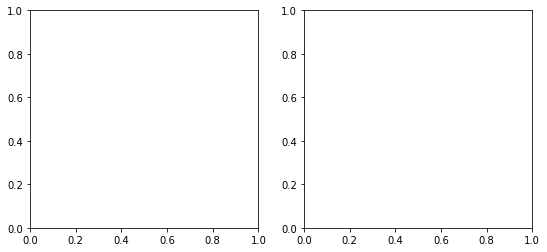

In [11]:
ax_index_lst=[0,0,1,1]
color_lst=['orange','blue','orange','blue']
#plot results
# scale_lst=[10**2.1,10**2.99]
saving=True
figsize=(9,4);fontsize=16
fig,axs=plt.subplots(ncols=2,figsize=figsize)

x_lst=[]
y_lst=[]
for diffCoef,model,file,ax_index,color,D_lst in zip(diffCoef_lst,model_lst,file_lst,ax_index_lst,color_lst,D_lst_lst):
    #plot results
    ax=axs[ax_index]
    ax.boxplot(D_lst,positions=[diffCoef*10**3],meanline=False)
    ax.set_xlabel(r'$D_{V_{mem}}$ cm$^2/$s',fontsize=fontsize)
    ax.set_ylabel(r'$D_{spiral\;tips}$ cm$^2/$s',fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.tick_params(axis='both', which='minor', labelsize=0)
    num_individuals=len(D_lst)
    y_lst.append(np.mean(D_lst))
    x_lst.append(diffCoef)
    
plt.show()
print('TODO: check units on y axis')
print('msd/d')

In [ ]:
ax_index_lst=[0,0,1,1]
color_lst=['orange','blue','orange','blue']
#plot results
# scale_lst=[10**2.1,10**2.99]
saving=True
figsize=(9,4);fontsize=16
fig,axs=plt.subplots(ncols=2,figsize=figsize)

x_lst=[]
y_lst=[]
for diffCoef,model,file,ax_index,color,D_lst in zip(diffCoef_lst,model_lst,file_lst,ax_index_lst,color_lst,D_lst_lst):
    #plot results
    ax=axs[ax_index]
    ax.boxplot(D_lst,positions=[diffCoef*10**3],meanline=False)
    ax.set_xlabel(r'$D_{V_{mem}}$ cm$^2/$s',fontsize=fontsize)
    ax.set_ylabel(r'$D_{spiral\;tips}$ cm$^2/$s',fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.tick_params(axis='both', which='minor', labelsize=0)
    num_individuals=len(D_lst)
    y_lst.append(np.mean(D_lst))
    x_lst.append(diffCoef)
    
plt.show()
print('TODO: check units on y axis')
print('msd')

In [ ]:
#plot resulting x_lst,y_lst

In [ ]:
#TODO: merge ^that with plot
#TODO: save figure
y_values =np.array(D_lst_lst[0])
print(f'D = {np.mean(y_values):.6f} +- {np.std(y_values):.6f} cm^2/s')

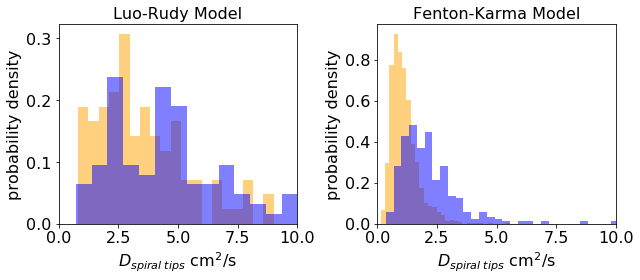

TODO: check units on x axis


In [628]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

ax_index_lst=[0,0,1,1]
color_lst=['orange','blue','orange','blue']
#plot results
# scale_lst=[10**2.1,10**2.99]
saving=True
figsize=(9,4);fontsize=16
fig,axs=plt.subplots(ncols=2,figsize=figsize)

x_lst=[]
y_lst=[]
for diffCoef,model,file,ax_index,color,D_lst in zip(diffCoef_lst,model_lst,file_lst,ax_index_lst,color_lst,D_lst_lst):
    y_values =np.array(D_lst) 

    #plot results
    ax=axs[ax_index]
    ax.hist(y_values,bins=30,density=True,alpha=0.5,color=color)
#     ax.boxplot(D_lst,positions=[diffCoef*10**3],meanline=False)
    ax.set_ylabel(r'probability density',fontsize=fontsize)
    ax.set_xlabel(r'$D_{spiral\;tips}$ cm$^2/$s',fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.tick_params(axis='both', which='minor', labelsize=0)
    num_individuals=len(y_values)
    y_lst.append(np.mean(y_values))
    x_lst.append(diffCoef)
    ax.set_title(model+' Model',fontsize=fontsize)
    
#     #plot max liklihood fit of to the poisson distribution
#     lam=np.mean(y_values)
#     t = np.arange(0, 10, 0.01)
#     d = np.exp(-lam)*np.power(lam, t)/factorial(t)
#     print(f"lambda={lam},variance={np.std(y_values)**2}")
#     ax.plot(t, d, '-',color=color)
    ax.set_xlim(0,10)
plt.tight_layout()
plt.show()
print('TODO: check units on x axis')

In [ ]:
#TODO: plot histogram of v_rms
#TODO: plot histogram of tau_0

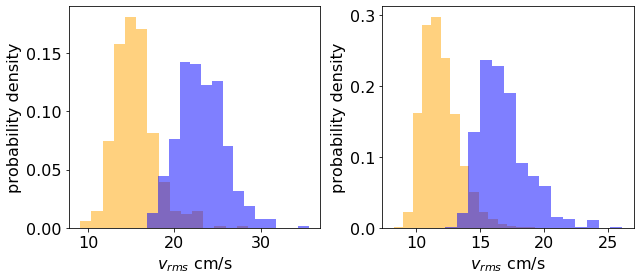

TODO: check units on x axis


In [622]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

ax_index_lst=[0,0,1,1]
color_lst=['orange','blue','orange','blue']
#plot results
# scale_lst=[10**2.1,10**2.99]
saving=True
figsize=(9,4);fontsize=16
fig,axs=plt.subplots(ncols=2,figsize=figsize)

x_lst=[]
y_lst=[]
for diffCoef,model,file,ax_index,color,v_rms_lst,D_lst in zip(diffCoef_lst,model_lst,file_lst,ax_index_lst,color_lst,v_rms_lst_lst,D_lst_lst):
#     y_values =np.sqrt( np.array(v_rms_lst)**2/diffCoef )
    y_values =np.array(v_rms_lst) 
    #plot results
    ax=axs[ax_index]
    ax.hist(y_values,bins=15,density=True,alpha=0.5,color=color)
    ax.set_ylabel(r'probability density',fontsize=fontsize)

    ax.set_xlabel(r'$v_{rms}$ cm/s',fontsize=fontsize)
#     ax.set_xlabel(r'$v_{rms}/\sqrt D_{V_{mem}}$ s',fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.tick_params(axis='both', which='minor', labelsize=0)
    num_individuals=y_values.shape[0]
    y_lst.append(np.mean(y_values))
    x_lst.append(diffCoef)
    
#     #plot max liklihood fit of to the poisson distribution
#     lam=np.mean(y_values)
#     t = np.arange(0, 35, 0.01)
#     d = np.exp(-lam)*np.power(lam, t)/factorial(t)
#     print(f"lambda={lam},variance={np.std(y_values)**2}")
#     ax.plot(t, d, '--',color=color)
plt.tight_layout()
plt.show()
print('TODO: check units on x axis')

__Results__
- for $v_{rms}$,
    - not poisson distributed (variance not equal to mean, and histogram doesn't match pdf
    - TODO: is the distribution of v_rms / diffCoef the same for all diffCoef's tested?
        - HINT: use kstest

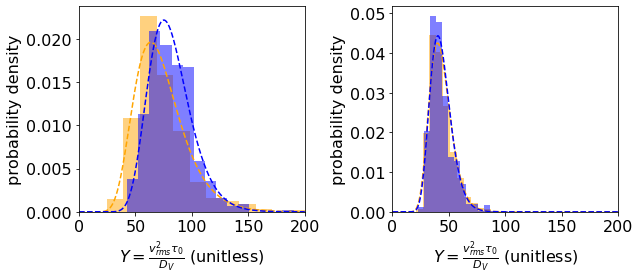

TODO: check units on x axis


In [649]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

sigma_lst=[0.305638,0.232963,0.228719,0.218431]
mu_lst=[4.24501,4.37385,3.74023,3.74157]
ax_index_lst=[0,0,1,1]
color_lst=['orange','blue','orange','blue']
#plot results
# scale_lst=[10**2.1,10**2.99]
# saving=True
figsize=(9,4);fontsize=16
fig,axs=plt.subplots(ncols=2,figsize=figsize)

x_lst=[]
y_lst=[]
for diffCoef,model,file,ax_index,color,v_rms_lst,D_lst,mu,sigma in zip(diffCoef_lst,model_lst,file_lst,ax_index_lst,color_lst,v_rms_lst_lst,D_lst_lst,mu_lst,sigma_lst):
#     y_values =np.sqrt( np.array(v_rms_lst)**2/diffCoef )
    y_values =np.array(v_rms_lst)**2 /(diffCoef*1000)*.150
    #plot results
    ax=axs[ax_index]
    ax.hist(y_values,bins=15,density=True,alpha=0.5,color=color)
    ax.set_ylabel(r'probability density',fontsize=fontsize)

    ax.set_xlabel(r'$Y=\frac{v^2_{rms}\tau_0}{D_V}$ (unitless)',fontsize=fontsize)
#     ax.set_xlabel(r'$v_{rms}/\sqrt D_{V_{mem}}$ s',fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.tick_params(axis='both', which='minor', labelsize=0)
    num_individuals=y_values.shape[0]
    y_lst.append(np.mean(y_values))
    x_lst.append(diffCoef)
    
    #plot max liklihood fit of to the lognormal distribution
    lognorm = lambda x: np.exp(-1 * (np.log(x) - mu)**2 / (2*sigma**2))/(np.sqrt(2*np.pi)*x*sigma)
    t = np.arange(0, 200, 0.1)
    d = lognorm(t)
    ax.plot(t, d, '--',color=color)
    ax.set_xlim(0,200)
plt.tight_layout()
plt.show()
print('TODO: check units on x axis')

In [421]:
t = np.arange(0, 35, 0.01)
d = np.exp(-lam)*np.power(lam, t)/factorial(t)
print(f"lambda={lam},variance={np.std(y_values)**2}")
ax.plot(t, d, '--',color=color)

ValueError: The samples x and y must have the same length.

In [437]:
#raw distributions are different (p~1e-123<0.0001)
print(stats.mannwhitneyu(v_rms_lst_lst[0],v_rms_lst_lst[1]))

print(stats.mannwhitneyu(np.array(v_rms_lst_lst[0])**2/diffCoef_lst[0],np.array(v_rms_lst_lst[1])**2/diffCoef_lst[1]))



MannwhitneyuResult(statistic=3895.0, pvalue=7.921735047919231e-123)
MannwhitneyuResult(statistic=60190.0, pvalue=3.954837409422911e-12)


__Methods__
- $H_0: \;v_{rms}/D_{V_{mem}}$ is drawn from the same distribution independent of $D_{V_{mem}}$ 
    - .. [2] H.B. Mann and D.R. Whitney, "On a Test of Whether one of Two Random
       Variables is Stochastically Larger than the Other," The Annals of
       Mathematical Statistics, vol. 18, no. 1, pp. 50-60, 1947.

Let $\tau_0=0.150$ seconds, fixed.

# compute mean/stdev emsd btwn trials for a fixed setting

In [568]:
from lib.routines.compute_msd import *

In [459]:
file=search_for_file()

File: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_0.001/trajectories_unwrap/ic001.21_traj_sr_600_mem_0_unwrap.csv


In [569]:
diffCoef=0.001
file_name_list = get_all_files_matching_pattern(file,trgt='_unwrap.csv')
print(f"N_trials={len(input_fn_lst)} (total)")
omit_time=0#ms
DS=0.025#cm/pixel
L=200#pixels
DT=compute_time_between_frames(pd.read_csv(file_name_list[0]));print(f"DT={DT}")
T_min=600#ms
num_individuals_thresh=5

df=compute_emsd_dataframe_for_trial_list(file_name_list=file_name_list, T_min=T_min, DT=DT, DS=DS,L=L,num_individuals_thresh=num_individuals_thresh, omit_time=omit_time)#,**kwargs)
t_values, msd_values, std_values = compute_average_std_msd(df,DT)

N_trials=157 (total)
DT=2.0


In [579]:
def plot_emsd_for_trials(ax,df,DT,T_min,colorA='blue',colorB='green'):
    t_values, msd_values, std_values = compute_average_std_msd(df,DT)
    saving=False
    src_lst=list(set(df.src.values))
    print(f"N_trials={len(src_lst)} (considered)")
    for src in src_lst:
        x_values = df[df.src==src].lagt.values
        y_values = df[df.src==src].msd.values
        ax.plot(x_values,y_values,c=colorA,alpha=0.2)
    ax.fill_between(t_values,msd_values-std_values,msd_values+std_values,color=colorB, alpha=0.3,step='post')
    ax.plot(t_values,msd_values,c=colorB,lw=2)
    ax.set_xlim([0,T_min/10**3])
    ax.set_xlabel('lag (s)', fontsize=fontsize)
    ax.set_ylabel(r'MSD (cm$^2$)', fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.tick_params(axis='both', which='minor', labelsize=0)

In [607]:
#get 1 _unwrap.csv from each trial to be considered
#LR
diffCoef_lst=[0.0005,0.00075,0.001]
file_lst=[]
for diffCoef in diffCoef_lst:
    file=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_{diffCoef}/trajectories_unwrap/ic001.21_traj_sr_600_mem_0_unwrap.csv"
    file_lst.append(file)

In [608]:
# colorA_lst=['blue','green','orange']
# colorB_lst=['purple','brown','red']
colorA_lst=['green','orange','red']
colorB_lst=colorA_lst

DT=2.0
N_trials=157 (total) for diffCoef=0.0005
Num. file names in list = 159.
N_trials=3 (considered)
N_trials=157 (total) for diffCoef=0.00075
Num. file names in list = 159.
N_trials=76 (considered)
N_trials=157 (total) for diffCoef=0.001
Num. file names in list = 157.
N_trials=11 (considered)
saved figure in 
	/home/timothytyree/Documents/GitHub/care/notebooks/Figures


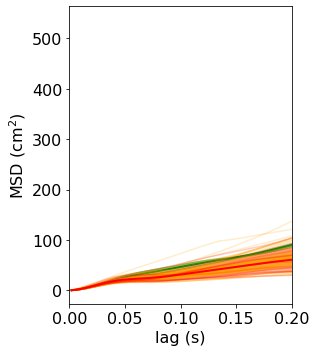

In [609]:
# figsize=4.5,5
fig,ax=plt.subplots(ncols=1,figsize=figsize)
# ax=axs[0]
savefig_fn='figure_emsd_over_diffCoef_LR_zoomed.pdf'
# savefig_fn='figure_emsd_LR.pdf'
saving=True
#plot LR EMSD's
omit_time=0#ms
DS=0.025#cm/pixel
L=200#pixels
DT=compute_time_between_frames(pd.read_csv(file_name_list[0]));print(f"DT={DT}")
T_min=600#ms
num_individuals_thresh=5
for file,diffCoef,colorA,colorB in zip(file_lst,diffCoef_lst,colorA_lst,colorB_lst):
    file_name_list = get_all_files_matching_pattern(file,trgt='_unwrap.csv')
    print(f"N_trials={len(input_fn_lst)} (total) for diffCoef={diffCoef}")
    df=compute_emsd_dataframe_for_trial_list(file_name_list=file_name_list, T_min=T_min, DT=DT, DS=DS,L=L,num_individuals_thresh=num_individuals_thresh, omit_time=omit_time)#,**kwargs)
    df.msd/=diffCoef*10*3
    # t_values, msd_values, std_values = compute_average_std_msd(df,DT)
    plot_emsd_for_trials(ax,df,DT,T_min,colorA=colorA,colorB=colorB)
    ax.set_xlim([0,.2])
#     ax.set_ylim([0,1])
#     ax.set_ylim([0,10])
if not saving:
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_folder}")
#     plt.close()

# testing equivalence of v_rms^2/(D) between data sets

In [593]:
diffCoef_lst=[0.0005,0.001,0.0005,0.001]
model_lst=['Luo-Rudy','Luo-Rudy', 'Luo-Rudy','Fenton-Karma','Fenton-Karma','Fenton-Karma']

In [603]:
i=3
yvals=np.array(v_rms_lst_lst[i])**2/diffCoef_lst[i]/10**3 #seconds
print(set(yvals))

{150.1190652324395, 181.37822060401507, 182.80844035716268, 184.7799905539672, 186.93742937228942, 186.3461113121228, 188.1031436335552, 186.6863577476716, 196.82919157437638, 196.3990465017394, 196.4976334612936, 199.6842962392526, 196.55938494005377, 201.32008914248274, 198.06596041629103, 198.71109322511884, 200.71466202558184, 205.41470366836194, 206.41117228054105, 206.53128212592836, 206.19169968608844, 209.82675414695072, 210.06184784652186, 211.00319253132204, 211.43417931921573, 211.59007633969017, 212.93674525481424, 213.08706659475814, 213.55708091188774, 213.2271008988783, 213.9739890782054, 214.21386458234346, 215.09888733478522, 215.44400500104305, 215.7752069678131, 219.14769800275192, 221.0555925382255, 223.6548378586859, 224.65527486102098, 224.15284044100542, 224.09702128006353, 225.8354230883746, 226.33514429674608, 226.5672091646525, 227.57007507462083, 227.54421579114182, 228.52570969967778, 228.41794654485398, 231.70111200359187, 231.49033149695987, 231.7376778593

In [591]:
len(v_rms_lst_lst)

4

## Mathematica--> LogNormal Distribution
`E^(-((-\[Mu] + Log[x])^2/(2 \[Sigma]^2)))/(Sqrt[2 \[Pi]] x \[Sigma])
LogNormalDistribution[Mu, Sigma]

(*LR*)
LogNormalDistribution[6.129528699582448, \
0.3170838093471624],
LogNormalDistribution[6.2818302653217755, 0.24880048328478718]

(*FK*)
LogNormalDistribution[5.651651563125813, \
0.2363798708408154],
LogNormalDistribution[5.651340620642062, 0.22664307552732016`]`

In [620]:
mu = mu_lst[0]
sigma=sigma_lst[0]
lognorm = lambda x: np.exp(-1 * (np.log(x) - mu)**2 / (2*sigma**2))/(np.sqrt(2*np.pi)*x*sigma)
lognorm(y_values[0]) 

7.077994937351229e-10

# Estimate the mean spiral tip density
$q=N/A= 0.2$ spiral tips per cm$^2$ appears to be a reasonable estimate.

In [17]:
file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_3.8_diffCoef_0.001/trajectories_unwrap/ic001.21_traj_sr_600_mem_0_unwrap.csv'
df=pd.read_csv(file)

In [23]:
q_avg=df.n.mean()/25
q_avg

0.2583319502074689